# Imports

In [42]:
import pandas as pd
from typing import List
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from omegaconf import OmegaConf
from datetime import datetime
from multiprocessing import Pool
import uncertainty_toolbox as uct
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import plotly.graph_objects as go
# from uncertainty_toolbox.viz import plot_calibration

# Aggregate Results

In [43]:
tail_path = "/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail"

tail_paths = glob.glob(os.path.join(tail_path, "*", "predictions*.csv"))
tail_paths

['/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_QuantileRegressionModel_CQR_07-18-2023_11-30-37-413836/predictions_60_80.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_QuantileRegressionModel_CQR_07-18-2023_11-30-37-413836/predictions_40_60.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_QuantileRegressionModel_CQR_07-18-2023_11-30-37-413836/predictions_80_100.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_QuantileRegressionModel_CQR_07-18-2023_11-30-37-413836/predictions.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_DERModel_None_07-18-2023_09-51-10-020825/predictions_60_80.csv',
 '/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_tail/usa_vars_repr_DERModel_None_07-18-2023_09-51-10-020825/predictions_40_60.csv',
 '/p/project/hai_uqmethodbox/experiment_output/us

In [44]:
def compute_overview_df(paths):
    datetime_format = "%d-%m-%Y_%H-%M-%S-%f"
    overview_df = pd.DataFrame()
    for idx, path in enumerate(paths):
        exp_dict = {}
        conf = OmegaConf.load(os.path.join(os.path.dirname(path), "config.yaml"))
        if "post_processing" in conf:
            exp_dict["uqmethod"] = conf.post_processing["_target_"].split(".")[-1]
        else:
            exp_dict["uqmethod"] = conf.uq_method["_target_"].split(".")[-1]
        date_string = "_".join(path.split(os.sep)[-2].split("_")[-2:])
        # exp_dict["date"] = datetime.strptime(date_string, datetime_format)
        exp_dict["pred_path"] = path
        exp_dict["conf_path"] = path.replace("predictions.csv", "config.yaml")
        exp_dict["metric_path"] = os.path.join(os.path.dirname(path), "csv_logs", "version_0", "metrics.csv")
        overview_df = pd.concat([overview_df, pd.DataFrame(exp_dict, index=[idx])])

    return overview_df

overview_df = compute_overview_df(tail_paths)
overview_df


uqmethod  \
0                          CQR   
1                          CQR   
2                          CQR   
3                          CQR   
4                     DERModel   
5                     DERModel   
6                     DERModel   
7                     DERModel   
8                  BNN_VI_ELBO   
9                  BNN_VI_ELBO   
10                 BNN_VI_ELBO   
11                 BNN_VI_ELBO   
12  DeterministicGaussianModel   
13  DeterministicGaussianModel   
14  DeterministicGaussianModel   
15  DeterministicGaussianModel   
16              MCDropoutModel   
17              MCDropoutModel   
18              MCDropoutModel   
19              MCDropoutModel   
20     DeepKernelLearningModel   
21     DeepKernelLearningModel   
22     DeepKernelLearningModel   
23     DeepKernelLearningModel   
24                LaplaceModel   
25                LaplaceModel   
26                LaplaceModel   
27                LaplaceModel   
28                   SWAGModel   
29                   SWAGModel   
30                   SWAGModel   
31                   SWAGModel   
32     QuantileRegressionModel   
33     QuantileRegressionModel   
34     QuantileRegressionModel   
35     QuantileRegressionModel   
36           DeepEnsembleModel   
37           DeepEnsembleModel   
38           DeepEnsembleModel   
39           DeepEnsembleModel   
40                   BaseModel   
41                   BaseModel   
42                   BaseModel   
43                   BaseModel   

                                            pred_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   
22  /p/project/hai_uqmethodbox/experiment_output/u...   
23  /p/project/hai_uqmethodbox/experiment_output/u...   
24  /p/project/hai_uqmethodbox/experiment_output/u...   
25  /p/project/hai_uqmethodbox/experiment_output/u...   
26  /p/project/hai_uqmethodbox/experiment_output/u...   
27  /p/project/hai_uqmethodbox/experiment_output/u...   
28  /p/project/hai_uqmethodbox/experiment_output/u...   
29  /p/project/hai_uqmethodbox/experiment_output/u...   
30  /p/project/hai_uqmethodbox/experiment_output/u...   
31  /p/project/hai_uqmethodbox/experiment_output/u...   
32  /p/project/hai_uqmethodbox/experiment_output/u...   
33  /p/project/hai_uqmethodbox/experiment_output/u...   
34  /p/project/hai_uqmethodbox/experiment_output/u...   
35  /p/project/hai_uqmethodbox/experiment_output/u...   
36  /p/project/hai_uqmethodbox/experiment_output/u...   
37  /p/project/hai_uqmethodbox/experiment_output/u...   
38  /p/project/hai_uqmethodbox/experiment_output/u...   
39  /p/project/hai_uqmethodbox/experiment_output/u...   
40  /p/project/hai_uqmethodbox/experiment_output/u...   
41  /p/project/hai_uqmethodbox/experiment_output/u...   
42  /p/project/hai_uqmethodbox/experimen

In [45]:
def compute_metrics_for_predictions(csv_path: str, selective_pred: bool) -> pd.DataFrame:
    """Compute metrics for prediction file.

    Args:
        save_dir: path_to_csv

    Returns:
        dataframe with computed metrics
    """
    coeff_of_variation = True
    pred_df = pd.read_csv(csv_path)

    if "pred_uct" in pred_df.columns:

        if selective_pred:
            threshold = pred_df["pred_uct"].quantile(0.9)

            # Filter the DataFrame to exclude the top 10% highest values
            pred_df = pred_df[pred_df["pred_uct"] <= threshold]
            
        uq_metrics = uct.metrics.get_all_metrics(
            pred_df["pred"].values.squeeze(),
            pred_df["pred_uct"].values.squeeze(),
            pred_df["targets"].values.squeeze(),
            verbose=False,
        )
        uq_metric_categories = ["scoring_rule", "avg_calibration", "sharpness", "accuracy"]
    else:
        uq_metric_categories = ["accuracy"]
        uq_metrics = {"accuracy": uct.metrics.get_all_accuracy_metrics(pred_df["pred"].values.squeeze(), pred_df["targets"].values.squeeze())}

    metrics_dict = {uq_cat: uq_metrics[uq_cat] for uq_cat in uq_metric_categories}

    # mulit column df holding the results
    df = pd.DataFrame.from_dict(metrics_dict, orient="index").stack().to_frame().T

    # drop multilevel
    df.columns = df.columns.droplevel(0)
    df["split"] = csv_path.split(os.sep)[-1].split(".")[0]
    df["pred_path"] = csv_path

    return df


In [46]:
def compute_uncertainty_df(overview_df):
    def parallel_process(paths: List[str], num_processes: int, selective_pred: bool):
        # Create a multiprocessing pool with the specified number of processes
        pool = Pool(processes=num_processes)
        # Map the paths to the process_path function and execute in parallel
        result_dfs = pool.starmap(compute_metrics_for_predictions, [(path, selective_pred) for path in paths])
        # Close the pool of processes
        pool.close()
        # Combine the resulting DataFrames into a single DataFrame
        combined_df = pd.concat(result_dfs, ignore_index=True)
        return combined_df

    # Assuming 'df' is your original DataFrame with the path column
    # Extract the paths from the DataFrame column
    paths = overview_df['pred_path'].tolist()

    # Specify the number of processes to use for parallel execution
    num_processes = 8  # Adjust according to your system capabilities

    # Call the parallel_process function to execute the processing in parallel
    uqmetric_df = parallel_process(paths, num_processes, selective_pred=False)
    selective_df = parallel_process(paths, num_processes, selective_pred=True)

    # merge model name column
    uqmetric_df = pd.merge(left=uqmetric_df, right=overview_df[["pred_path", "uqmethod"]], how="left", left_on="pred_path", right_on="pred_path")
    selective_df = pd.merge(left=selective_df, right=overview_df[["pred_path", "uqmethod"]], how="left", left_on="pred_path", right_on="pred_path")

    return uqmetric_df, selective_df


uq_metric_df, selective_df = compute_uncertainty_df(overview_df)

# full_df = pd.DataFrame()
# for index, row in tqdm(overview_df.iterrows()):
#     uct_df = compute_metrics_for_predictions(row["pred_path"])
#     uct_df["model_name"] = row["uqmethod"]
#     full_df = pd.concat([full_df, uct_df])
uq_metric_df

KeyboardInterrupt: 

 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics


# TAIL

## OOD Plot

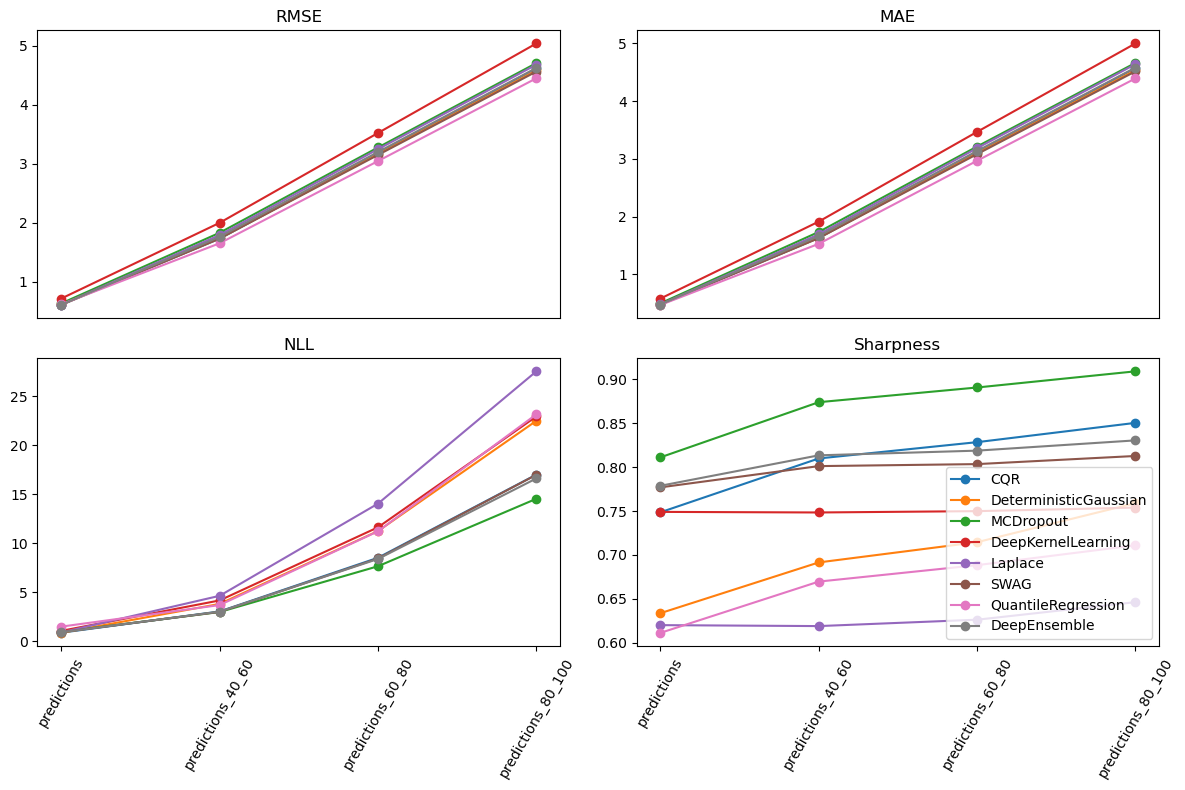

In [ ]:
def create_ood_plot(full_df: pd.DataFrame, gap=False) -> plt.Figure:
    """Create plot for levels of OOD.

    Args:
        full_df: df that holds all metric information

    Returns:
        figure
    """
    models = full_df["uqmethod"].unique()

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    for model in models:
        model_df = full_df[full_df["uqmethod"] == model].copy()
        if not gap:
            model_df.sort_values(by="split", inplace=True)
        model_df.reset_index(drop=True, inplace=True)

        ax[0, 0].plot(model_df["split"].values, model_df["rmse"].values, marker="o", label=model.replace("Model", ""))
        ax[0, 0].set_title("RMSE")
        ax[0, 0].set_xticks([])
        ax[0, 1].plot(model_df["split"].values, model_df["mae"].values, marker="o", label=model.replace("Model", ""))
        ax[0, 1].set_title("MAE")
        ax[0, 1].set_xticks([])

        ax[1, 0].plot(model_df["split"].values, model_df["nll"].values, marker="o", label=model.replace("Model", ""))
        ax[1, 0].set_title("NLL")
        ax[1, 0].tick_params("x", labelrotation=60)
        ax[1, 1].plot(model_df["split"].values, model_df["sharp"].values, marker="o", label=model.replace("Model", ""))
        ax[1, 1].set_title("Sharpness")
        ax[1, 1].tick_params("x", labelrotation=60)

    plt.legend()
    plt.tight_layout()
    plt.close()
    display(fig)


uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    # 'BNN_VI_ELBO',
    # 'DERModel', 
    # 'BaseModel'
]
create_ood_plot(uq_metric_df[uq_metric_df["uqmethod"].isin(uq_methods_to_show)])

## Calibration

In [ ]:
from typing import Union, List, Any
from matplotlib.axes import Axes
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists,
    get_proportion_lists_vectorized,
    adversarial_group_calibration,
    miscalibration_area,
    miscalibration_area_from_proportions,
)

def filter_subset(input_list: List[List[Any]], n_subset: int) -> List[List[Any]]:
    """Keep only n_subset random indices from all lists given in input_list.

    Args:
        input_list: list of lists.
        n_subset: Number of points to plot after filtering.

    Returns:
        List of all input lists with sizes reduced to n_subset.
    """
    assert type(n_subset) is int
    n_total = len(input_list[0])
    idx = np.random.choice(range(n_total), n_subset, replace=False)
    idx = np.sort(idx)
    output_list = []
    for inp in input_list:
        outp = inp[idx]
        output_list.append(outp)
    return output_list

def plot_calibration(
    y_pred: np.ndarray,
    y_std: np.ndarray,
    y_true: np.ndarray,
    split_name: str,
    n_subset: Union[int, None] = None,
    curve_label: Union[str, None] = None,
    vectorized: bool = True,
    exp_props: Union[np.ndarray, None] = None,
    obs_props: Union[np.ndarray, None] = None,
    ax: Union[Axes, None] = None,
    prop_type: str = "interval",
) -> Axes:
    """Plot the observed proportion vs prediction proportion of outputs falling into a
    range of intervals, and display miscalibration area.

    Args:
        y_pred: 1D array of the predicted means for the held out dataset.
        y_std: 1D array of the predicted standard deviations for the held out dataset.
        y_true: 1D array of the true labels in the held out dataset.
        n_subset: Number of points to plot after filtering.
        curve_label: legend label str for calibration curve.
        vectorized: plot using get_proportion_lists_vectorized.
        exp_props: plot using the given expected proportions.
        obs_props: plot using the given observed proportions.
        ax: matplotlib.axes.Axes object.
        prop_type: "interval" to measure observed proportions for centered prediction intervals,
                   and "quantile" for observed proportions below a predicted quantile.
                   Ignored if exp_props and obs_props are provided as inputs.

    Returns:
        matplotlib.axes.Axes object with plot added.
    """
    # Create ax if it doesn't exist
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    # Optionally select a subset
    if n_subset is not None:
        [y_pred, y_std, y_true] = filter_subset([y_pred, y_std, y_true], n_subset)

    if (exp_props is None) or (obs_props is None):
        # Compute exp_proportions and obs_proportions
        if vectorized:
            (
                exp_proportions,
                obs_proportions,
            ) = get_proportion_lists_vectorized(
                y_pred, y_std, y_true, prop_type=prop_type
            )
        else:
            (exp_proportions, obs_proportions) = get_proportion_lists(
                y_pred, y_std, y_true, prop_type=prop_type
            )
    else:
        # If expected and observed proportions are given
        exp_proportions = np.array(exp_props).flatten()
        obs_proportions = np.array(obs_props).flatten()
        if exp_proportions.shape != obs_proportions.shape:
            raise RuntimeError("exp_props and obs_props shape mismatch")

    # Set label
    if curve_label is None:
        curve_label = "Predictor"

    # Plot
    ax.plot([0, 1], [0, 1], "--", c="gray")
    ax.plot(exp_proportions, obs_proportions, label=curve_label.replace("Model", ""))#, c="#1f77b4")
    # ax.fill_between(exp_proportions, exp_proportions, obs_proportions, alpha=0.1)

    # Format plot
    ax.set_xlabel("Predicted Proportion in Interval")
    ax.set_ylabel("Observed Proportion in Interval")
    ax.axis("square")

    buff = 0.01
    ax.set_xlim([0 - buff, 1 + buff])
    ax.set_ylim([0 - buff, 1 + buff])

    ax.set_title(f"Avg Calibration {split_name}")

    # Compute miscalibration area
    miscalibration_area = miscalibration_area_from_proportions(
        exp_proportions=exp_proportions, obs_proportions=obs_proportions
    )

    # Annotate plot with the miscalibration area
    # ax.text(
    #     x=0.95,
    #     y=0.05,
    #     s="Miscalibration area = %.2f" % miscalibration_area,
    #     verticalalignment="bottom",
    #     horizontalalignment="right",
    #     fontsize="small",
    # )

    return ax

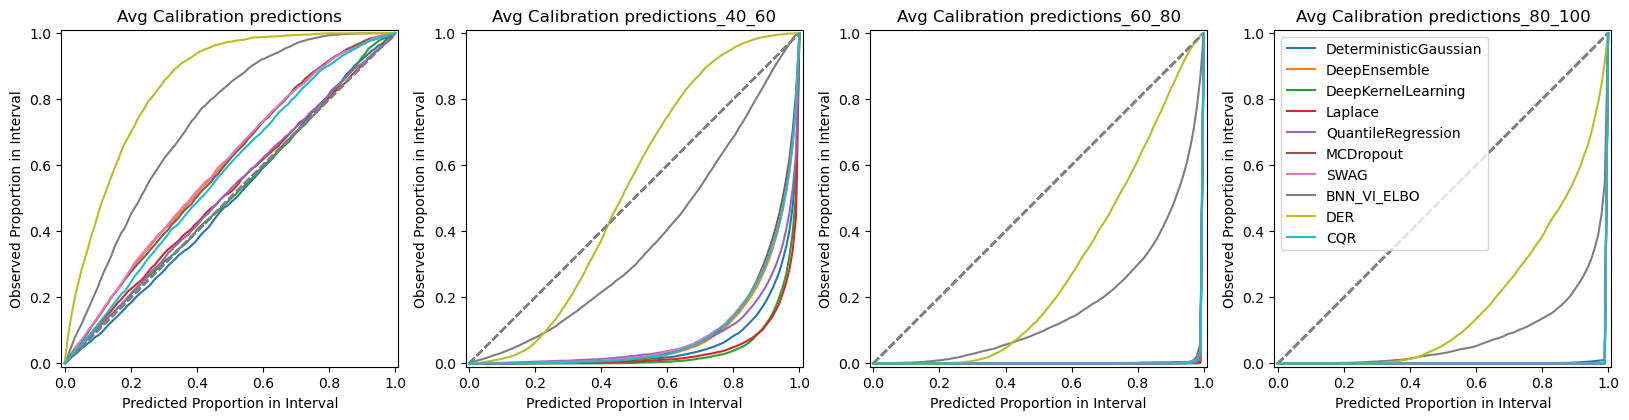

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    "CQR",
    'BaseModel'
]

def generate_calibration_plot(uqmetric_df, gap=False):
    if gap:
        ncols=2
    else:
        ncols=4
    fig, axs = plt.subplots(ncols=ncols, figsize=(20, 12))
    for uq_method in uq_methods_to_show:
        plot_df = uqmetric_df[uqmetric_df["uqmethod"]==uq_method].copy()
        plot_df.sort_values(by="split", inplace=True)
        plot_df.reset_index(inplace=True)
        # for idx, pred_path in enumerate(plot_df["pred_path"].unique()):
        for idx, row in plot_df.iterrows():
            split_df = pd.read_csv(row["pred_path"])
            # print(split_df)
            if "pred_uct" in split_df.columns:
                plot_calibration(split_df["pred"].values.squeeze(), split_df["pred_uct"].values.squeeze(), split_df["targets"].values.squeeze(), ax=axs[idx], curve_label=uq_method, split_name=row["split"])

    plt.legend()
generate_calibration_plot(uq_metric_df)


## Scatter Plots

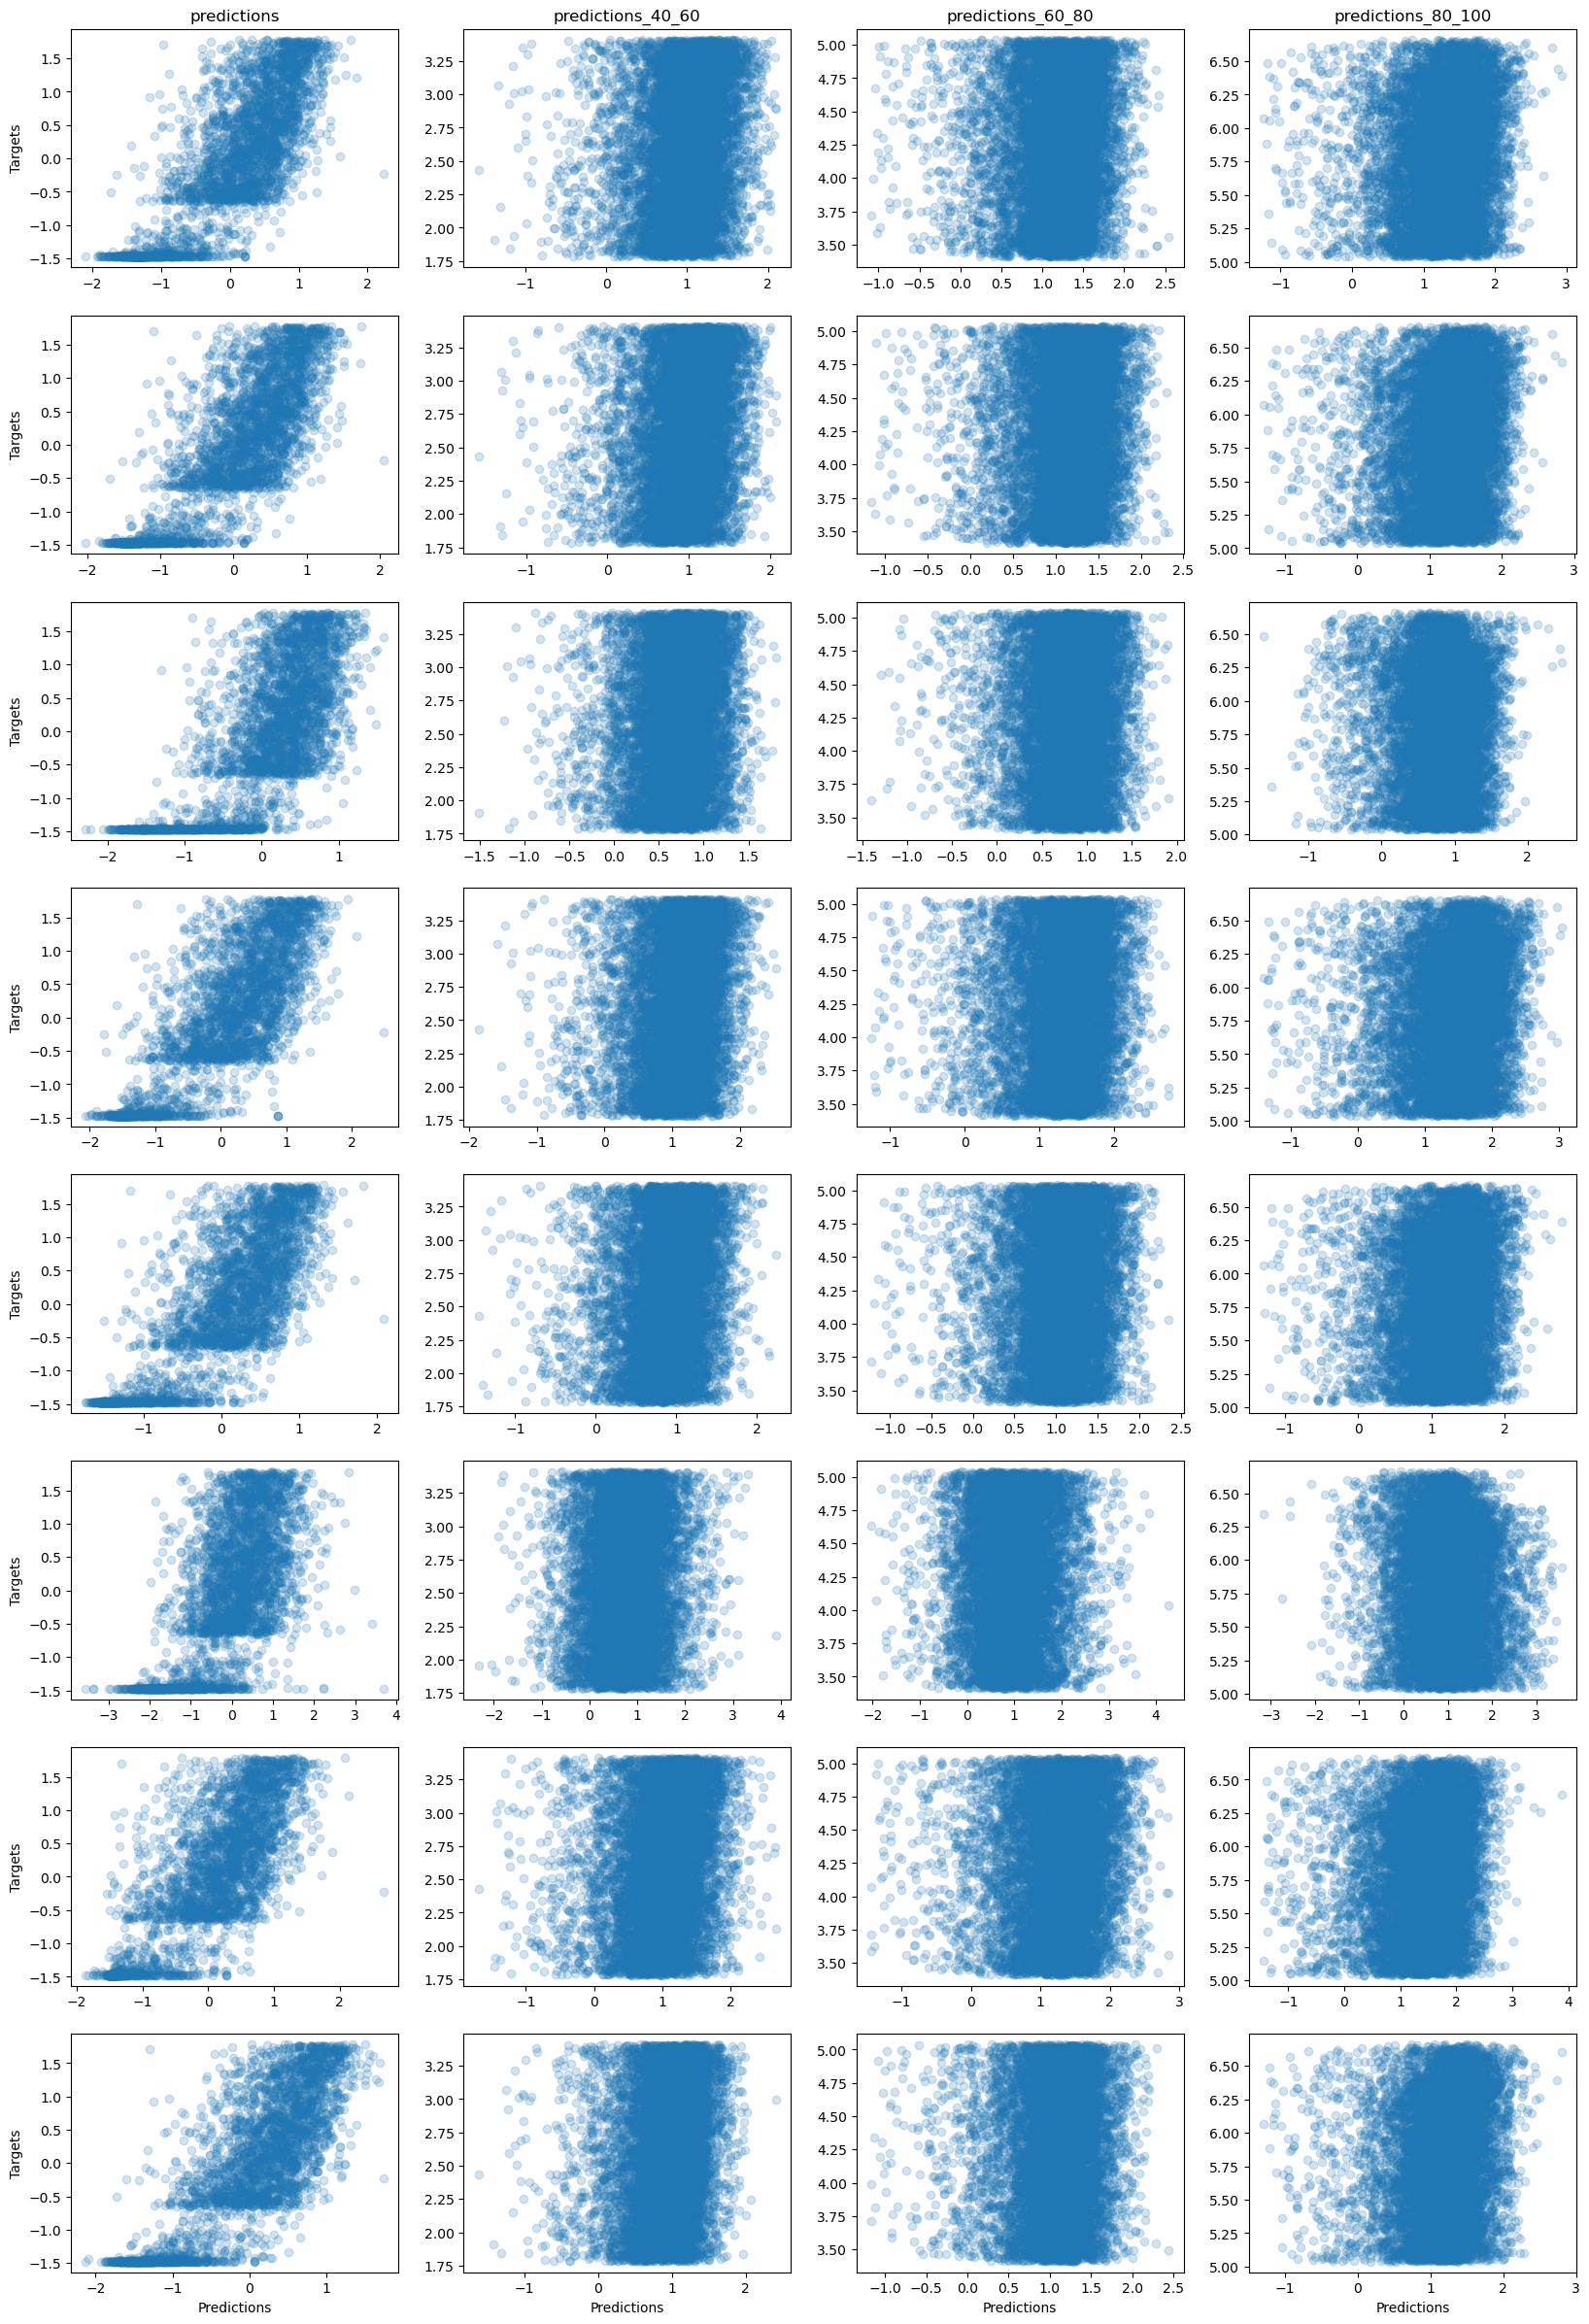

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    # "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    # "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    # "CQR",
    'BaseModel'
]

fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(20,30))
for row_idx, uq_method in enumerate(uq_methods_to_show):
    uq_df = overview_df[overview_df["uqmethod"]==uq_method].copy()
    uq_df.sort_values(by="pred_path", inplace=True)
    uq_df.reset_index(drop=True, inplace=True)
    for col_idx, row in uq_df.iterrows():
        pred_df = pd.read_csv(row["pred_path"])

        axs[row_idx, col_idx].scatter(pred_df["pred"].values, pred_df["targets"].values, alpha=0.2)

        if row_idx == len(uq_methods_to_show) - 1:
            axs[row_idx, col_idx].set_xlabel("Predictions")
        if row_idx == 0:
            split = row["pred_path"].split(os.sep)[-1].split(".")[0]
            axs[row_idx, col_idx].set_title(f"{split}")
        if col_idx == 0:
            axs[row_idx, col_idx].set_ylabel("Targets")

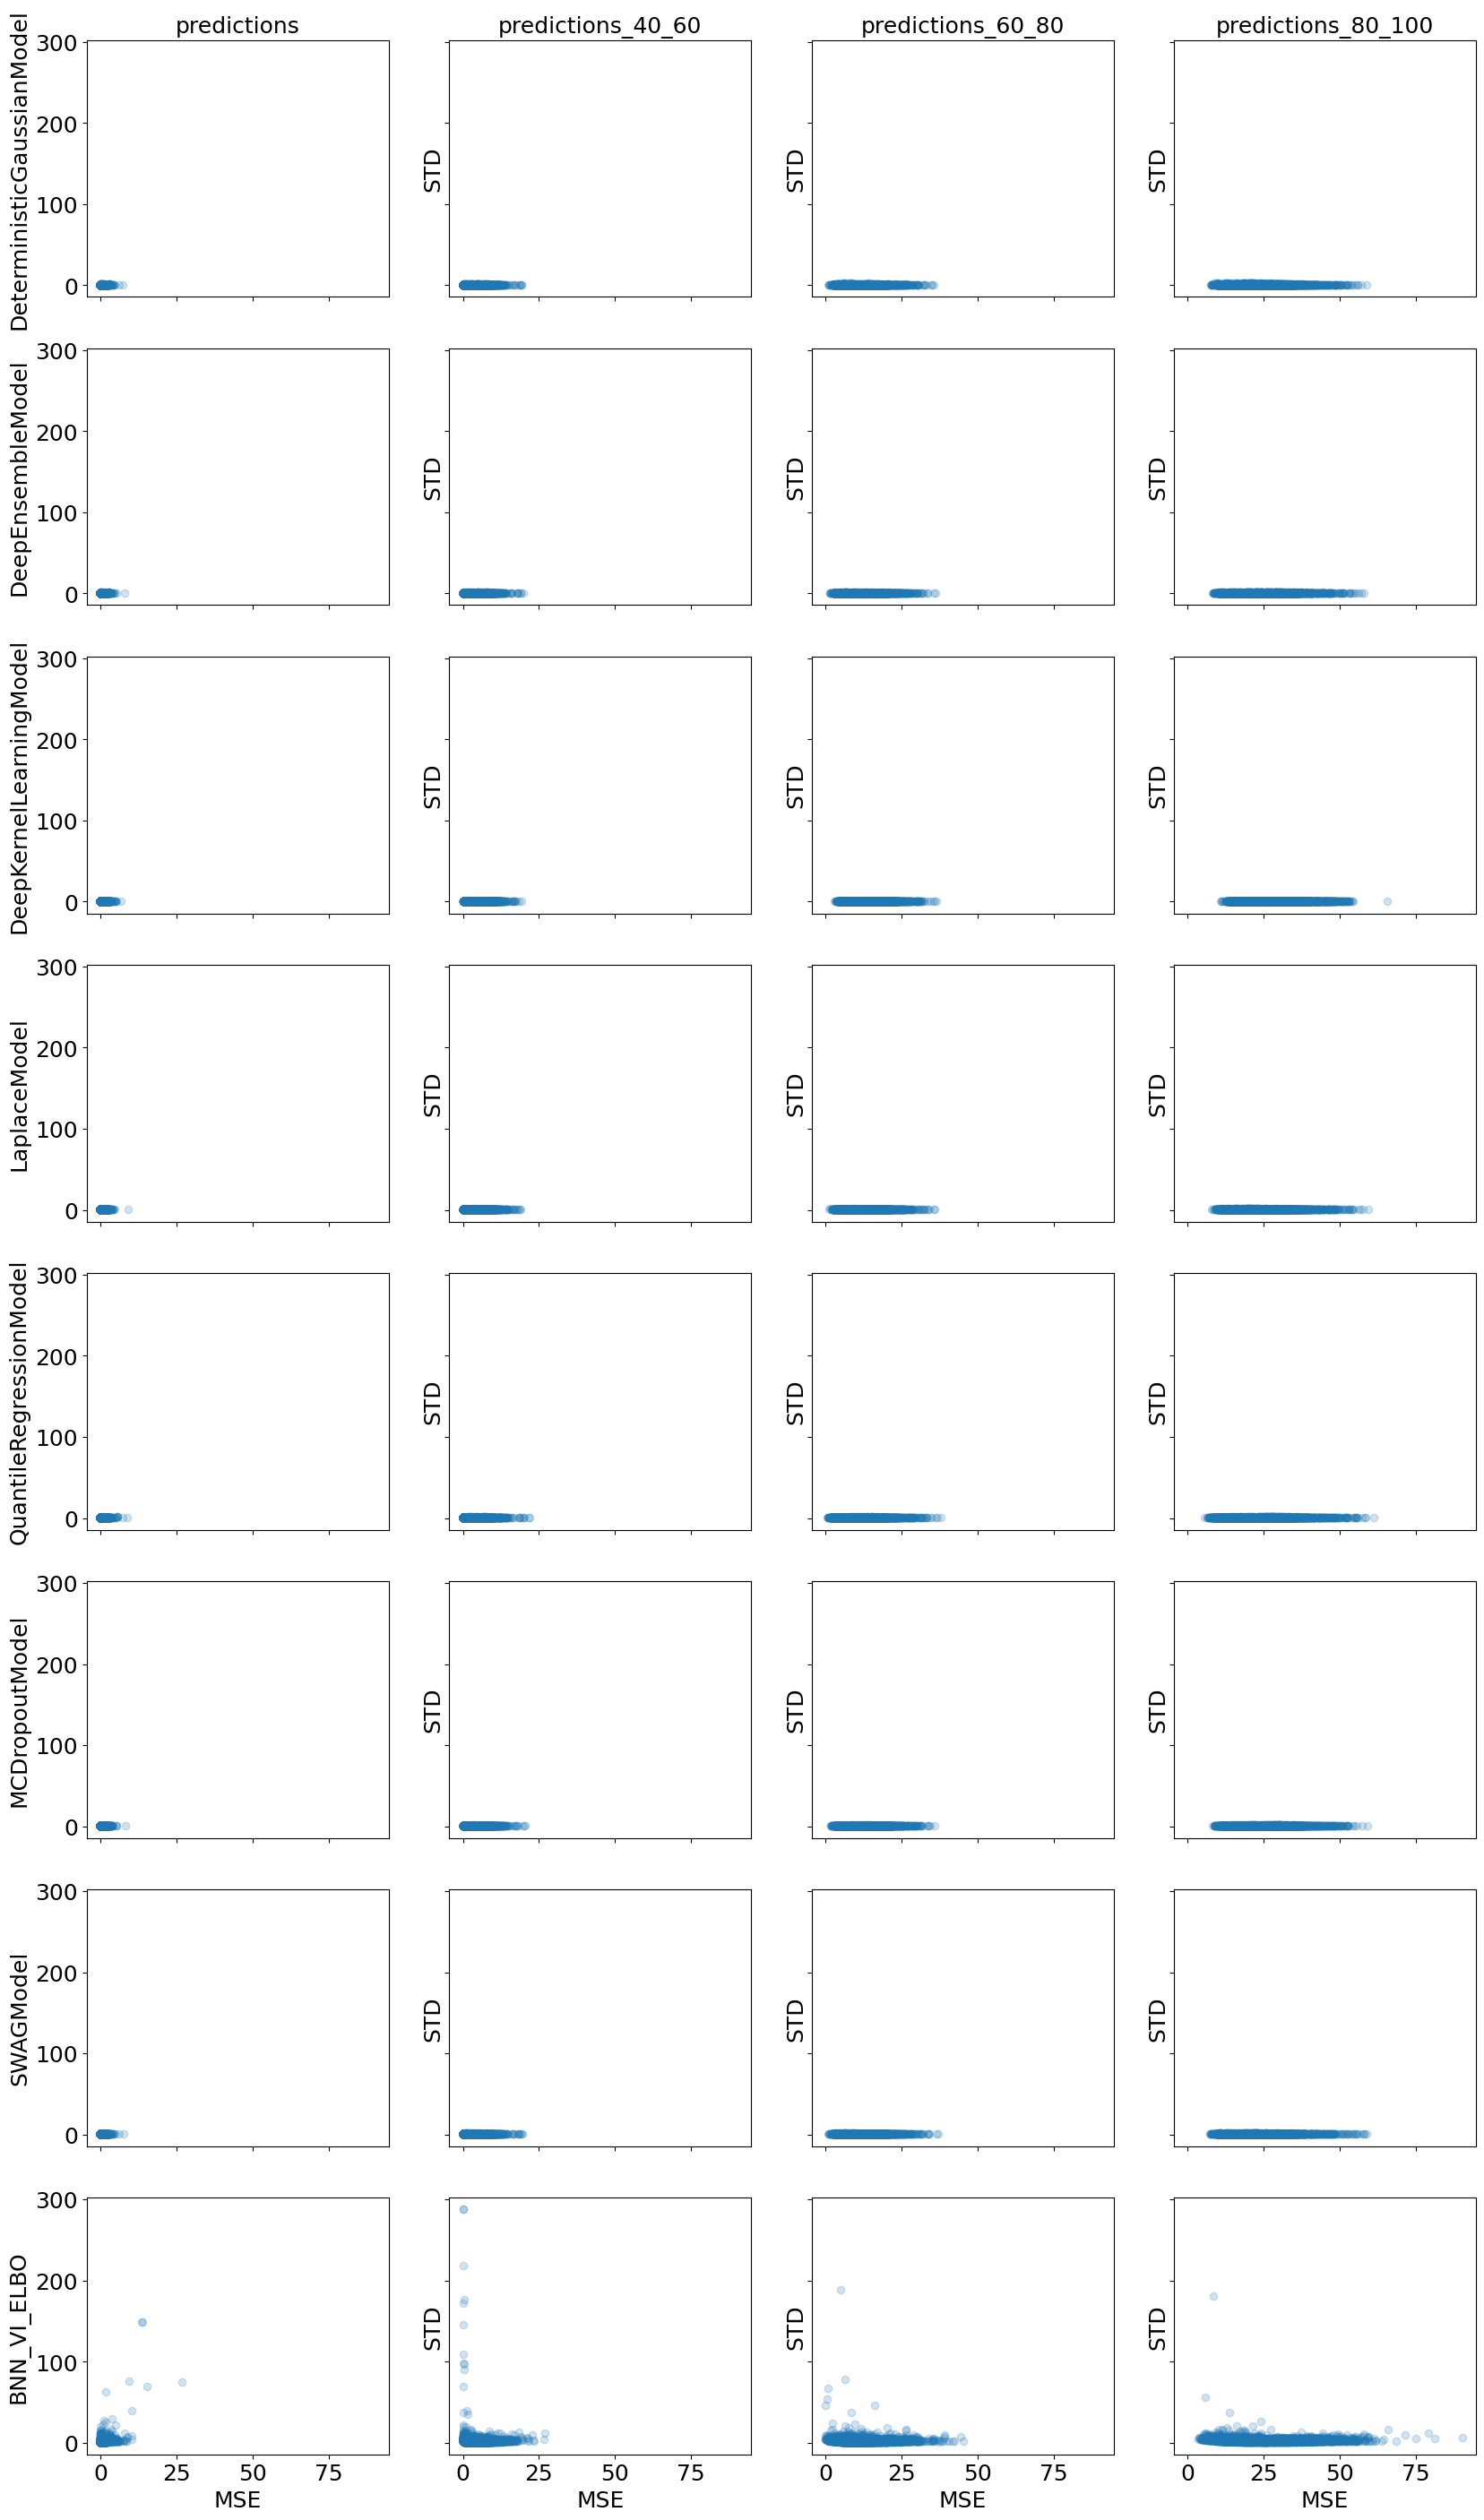

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # "CQR",
]

def generate_scatter_plots(overview_df, gap=False):
    if gap:
        ncols=2
    else:
        ncols=4

    fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=ncols, figsize=(20,35), sharex=True, sharey=True)
    for row_idx, uq_method in enumerate(uq_methods_to_show):
        uq_df = overview_df[overview_df["uqmethod"]==uq_method].copy()
        if not gap:
            uq_df.sort_values(by="pred_path", inplace=True)
        uq_df.reset_index(drop=True, inplace=True)
        for col_idx, row in uq_df.iterrows():
            pred_df = pd.read_csv(row["pred_path"])

            mse = (pred_df["pred"] - pred_df["targets"])**2


            axs[row_idx, col_idx].scatter(mse, pred_df["pred_uct"].values, alpha=0.2)

            axs[row_idx, col_idx].tick_params(axis='both', which='major', labelsize=18)

            if row_idx == len(uq_methods_to_show) - 1:
                axs[row_idx, col_idx].set_xlabel("MSE", fontsize=18)
            if row_idx == 0:
                split = row["pred_path"].split(os.sep)[-1].split(".")[0]
                axs[row_idx, col_idx].set_title(f"{split}", fontsize=18)
            if col_idx != 0:
                axs[row_idx, col_idx].set_ylabel("STD", fontsize=18)
            if col_idx == 0:
                axs[row_idx, col_idx].set_ylabel(uq_method, fontsize=18)

    # plt.setp(axs, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

generate_scatter_plots(overview_df)


## Prediction Intervals

In [ ]:
from typing import Tuple
def plot_intervals_ordered(
    y_pred: np.ndarray,
    y_std: np.ndarray,
    y_true: np.ndarray,
    n_subset: Union[int, None] = None,
    ylims: Union[Tuple[float, float], None] = None,
    num_stds_confidence_bound: int = 2,
    ax: Union[Axes, None] = None,
) -> Axes:
    """Plot predictions and predictive intervals versus true values, with points ordered
    by true value along x-axis.

    Args:
        y_pred: 1D array of the predicted means for the held out dataset.
        y_std: 1D array of the predicted standard deviations for the held out dataset.
        y_true: 1D array of the true labels in the held out dataset.
        n_subset: Number of points to plot after filtering.
        ylims: a tuple of y axis plotting bounds, given as (lower, upper).
        num_stds_confidence_bound: width of intervals, in terms of number of standard
            deviations.
        ax: matplotlib.axes.Axes object.

    Returns:
        matplotlib.axes.Axes object with plot added.
    """
    # Create ax if it doesn't exist
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))

    # Optionally select a subset
    if n_subset is not None:
        [y_pred, y_std, y_true] = filter_subset([y_pred, y_std, y_true], n_subset)

    order = np.argsort(y_true.flatten())
    y_pred, y_std, y_true = y_pred[order], y_std[order], y_true[order]
    xs = np.arange(len(order))
    intervals = num_stds_confidence_bound * y_std

    # Plot
    ax.errorbar(
        xs,
        y_pred,
        intervals,
        fmt="o",
        ls="none",
        linewidth=1.5,
        c="#1f77b4",
        alpha=0.5,
    )
    h1 = ax.plot(xs, y_pred, "o", c="#1f77b4")
    h2 = ax.plot(xs, y_true, "--", linewidth=2.0, c="#ff7f0e")

    # Legend
    ax.legend([h1[0], h2[0]], ["Predicted Values", "Observed Values"], loc=4)

    # Determine lims
    if ylims is None:
        intervals_lower_upper = [y_pred - intervals, y_pred + intervals]
        lims_ext = [
            int(np.floor(np.min(intervals_lower_upper[0]))),
            int(np.ceil(np.max(intervals_lower_upper[1]))),
        ]
    else:
        lims_ext = ylims

    # Format plot
    # ax.set_ylim(lims_ext)
    # 
    ax.set_ylabel("Predicted Values and Intervals")
    ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable="box")

    return ax

No handles with labels found to put in legend.


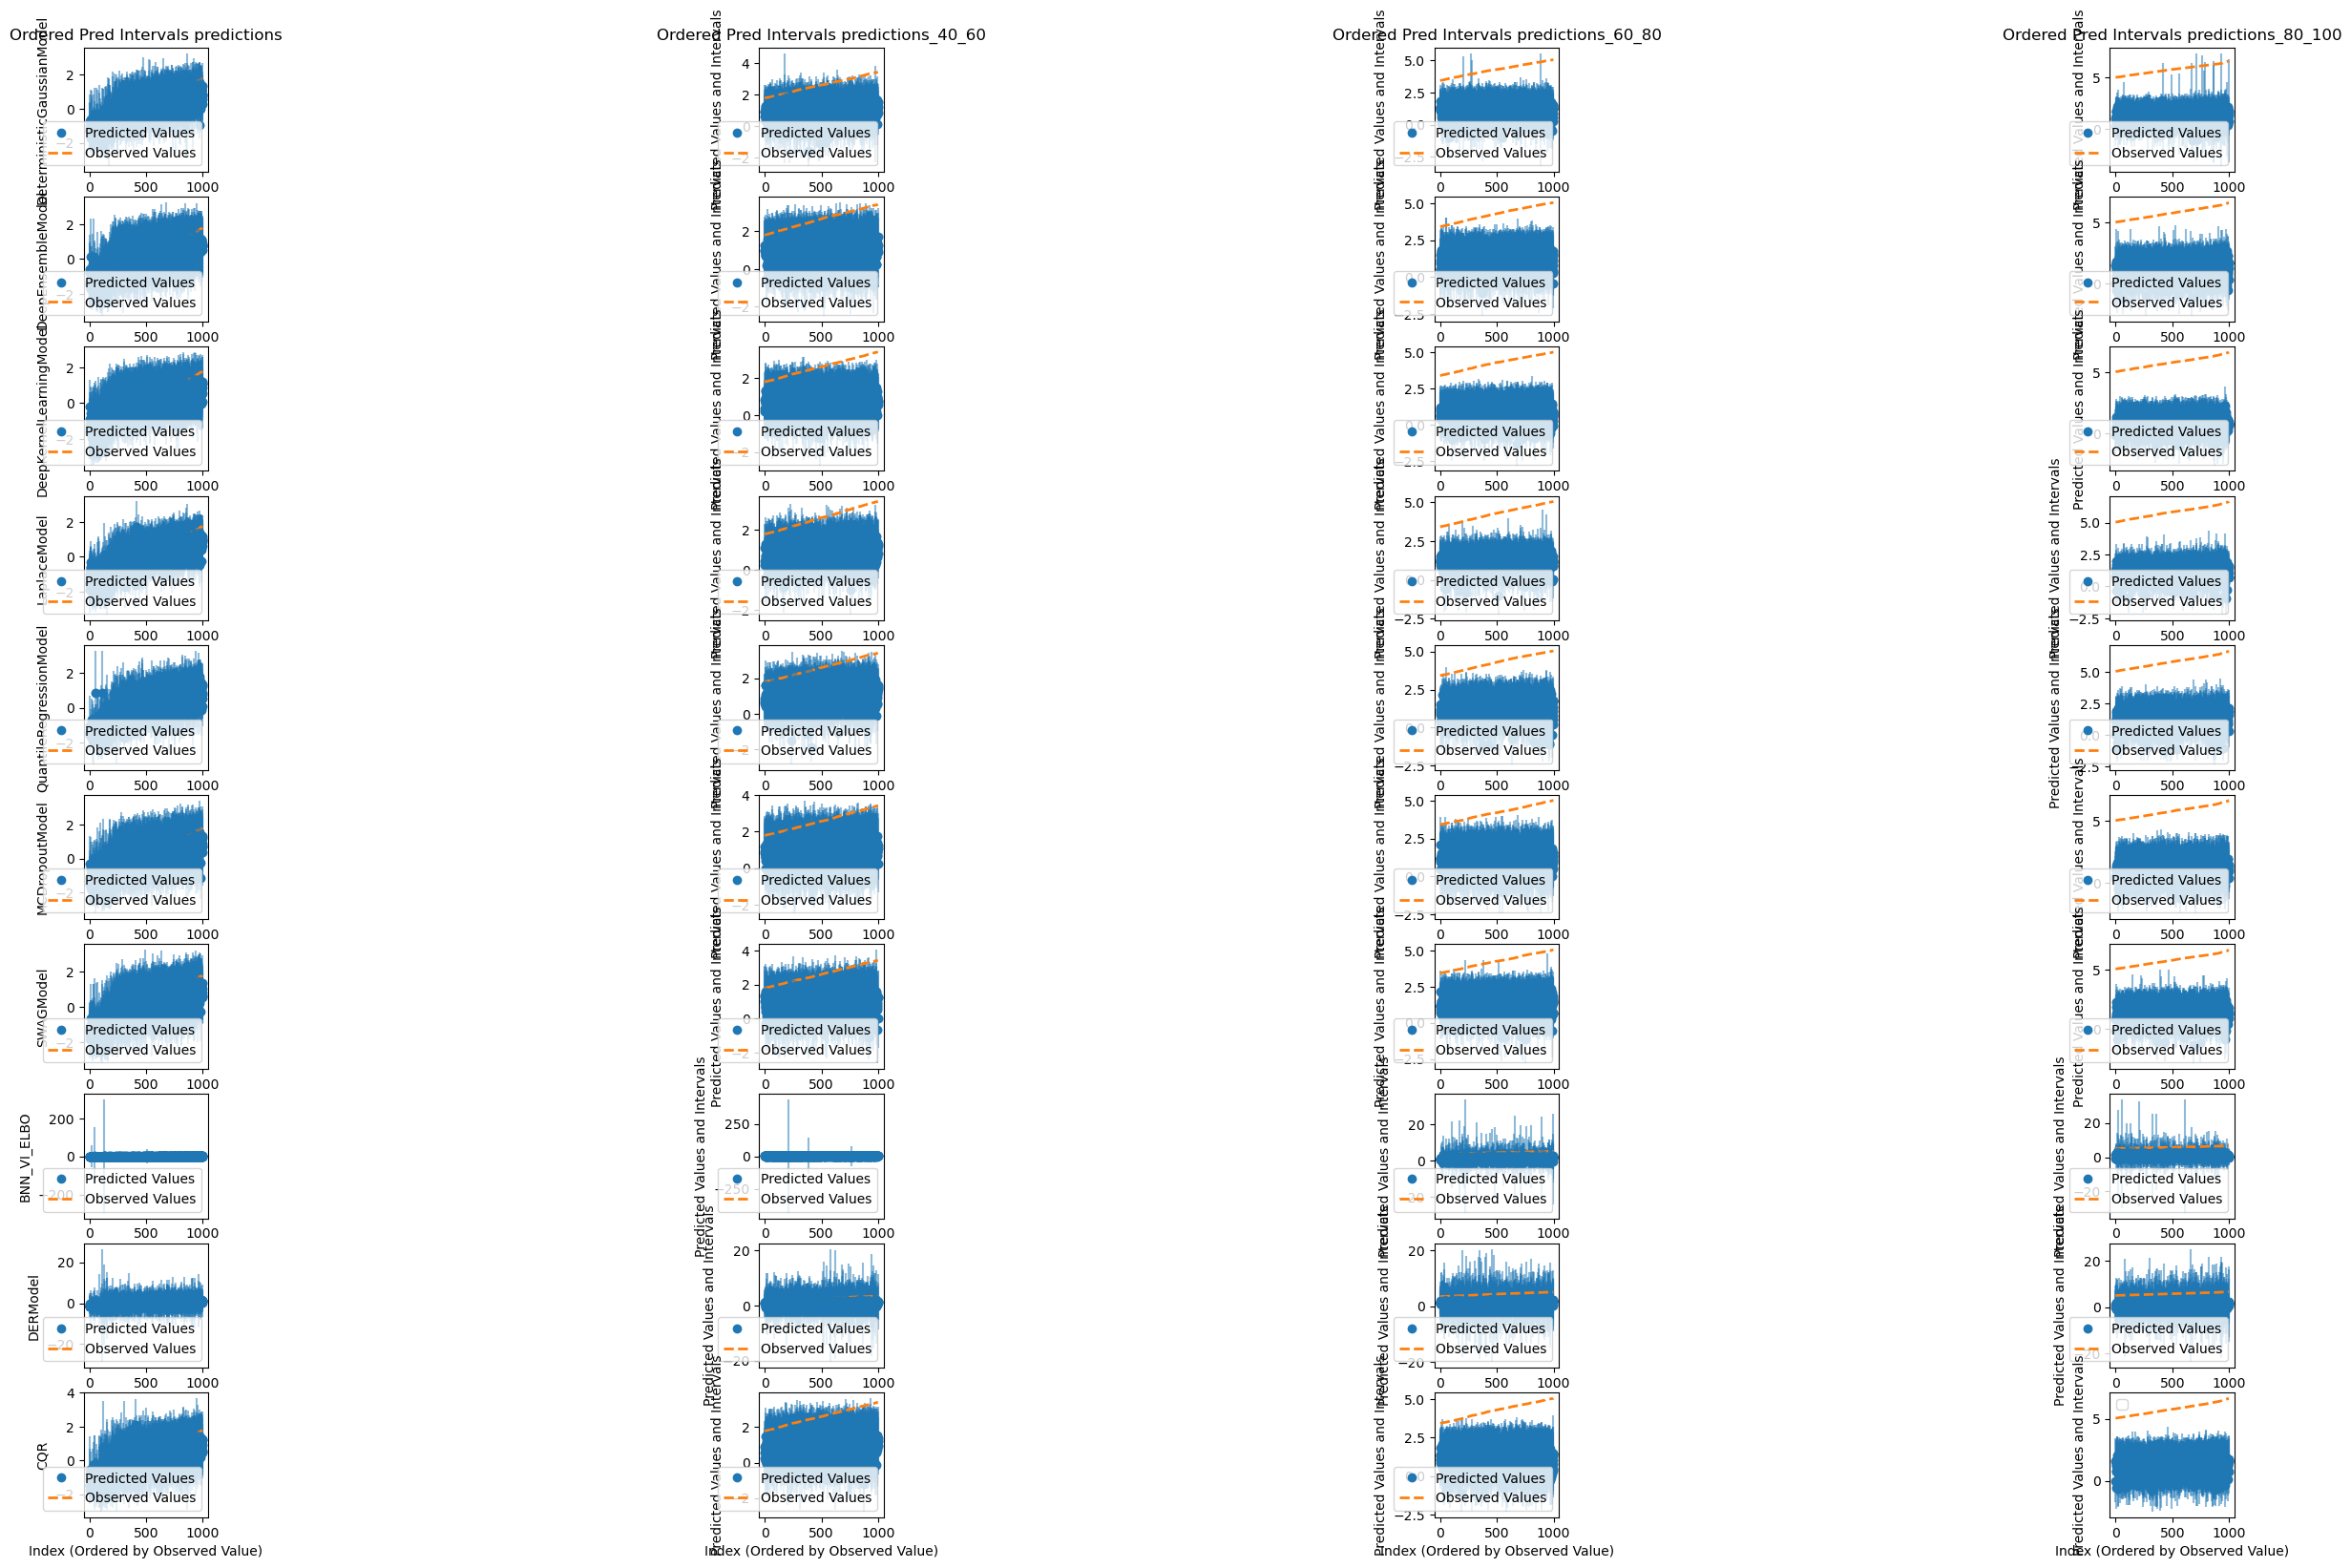

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "LaplaceModel",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    "SWAGModel",
    'BNN_VI_ELBO', 
    'DERModel', 
    "CQR",
    # 'BaseModel'
]

fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(35, 20))
for idx_uq, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="split", inplace=True)
    plot_df.reset_index(inplace=True)
    # for idx, pred_path in enumerate(plot_df["pred_path"].unique()):
    for idx, row in plot_df.iterrows():
        split_df = pd.read_csv(row["pred_path"])
        # print(split_df)
        if "pred_uct" in split_df.columns:
            plot_intervals_ordered(split_df["pred"].values.squeeze(), split_df["pred_uct"].values.squeeze(), split_df["targets"].values.squeeze(), n_subset=1000, ax=axs[idx_uq, idx])
        if idx_uq == 0:
            axs[idx_uq,idx].set_title(f"Ordered Pred Intervals {row['split']}")

        if idx_uq == len(uq_methods_to_show) - 1:
            axs[idx_uq, idx].set_xlabel("Index (Ordered by Observed Value)")
    axs[idx_uq,0].set_ylabel(uq_method)


plt.legend()

# GAP

In [ ]:
# split predictions in predictions_left.csv, predictions_right.csv
def split_predictions_into_left_right(overview_df):
    for row_idx, row in overview_df.iterrows():
        if row["pred_path"].endswith("predictions.csv"):
            pred_df = pd.read_csv(row["pred_path"])
            left = pred_df[pred_df["targets"]<0].copy()
            right = pred_df[pred_df["targets"]>=0].copy()
            left.to_csv(os.path.join(os.path.dirname(row["pred_path"]), "predictions_left.csv"), index=False)
            right.to_csv(os.path.join(os.path.dirname(row["pred_path"]), "predictions_right.csv"), index=False)

In [ ]:
gap_path = "/p/project/hai_uqmethodbox/experiment_output/usa_vars_ood_small_gap"

gap_paths = glob.glob(os.path.join(gap_path, "*", "predictions*.csv"))
overview_df_gap = compute_overview_df(gap_paths)

# split_predictions_into_left_right(overview_df_gap)

# gap_paths = glob.glob(os.path.join(gap_path, "*", "predictions_*.csv"))
# overview_df_gap = compute_overview_df(gap_paths)
# overview_df_gap["split"] = overview_df_gap["pred_path"].str.split(os.sep, expand=True)[7].str.split(".", expand=True)[0]
# overview_df_gap['split'] = pd.Categorical(overview_df_gap['split'], categories=sorting_order, ordered=True)
# overview_df_gap = overview_df_gap.sort_values('split')
overview_df_gap

# sorting_order = ['predictions_left', 'predictions_gap', 'predictions_right']

# # Convert 'split' column to categorical with the desired sorting order
# overview_df_gap['split'] = pd.Categorical(overview_df_gusa_vars_ood_small_gapusa_vars_ood_small_gapap['split'], categories=sorting_order, ordered=True)
# overview_df_gap

uqmethod  \
0   DeterministicGaussianModel   
1   DeterministicGaussianModel   
2                    BaseModel   
3                    BaseModel   
4                 LaplaceModel   
5                 LaplaceModel   
6      QuantileRegressionModel   
7      QuantileRegressionModel   
8            DeepEnsembleModel   
9            DeepEnsembleModel   
10                   SWAGModel   
11                   SWAGModel   
12     DeepKernelLearningModel   
13     DeepKernelLearningModel   
14                 BNN_VI_ELBO   
15                 BNN_VI_ELBO   
16                    DERModel   
17                    DERModel   
18              MCDropoutModel   
19              MCDropoutModel   
20                         CQR   
21                         CQR   

                                            pred_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   

                                            conf_path  \
0   /p/project/hai_uqmethodbox/experiment_output/u...   
1   /p/project/hai_uqmethodbox/experiment_output/u...   
2   /p/project/hai_uqmethodbox/experiment_output/u...   
3   /p/project/hai_uqmethodbox/experiment_output/u...   
4   /p/project/hai_uqmethodbox/experiment_output/u...   
5   /p/project/hai_uqmethodbox/experiment_output/u...   
6   /p/project/hai_uqmethodbox/experiment_output/u...   
7   /p/project/hai_uqmethodbox/experiment_output/u...   
8   /p/project/hai_uqmethodbox/experiment_output/u...   
9   /p/project/hai_uqmethodbox/experiment_output/u...   
10  /p/project/hai_uqmethodbox/experiment_output/u...   
11  /p/project/hai_uqmethodbox/experiment_output/u...   
12  /p/project/hai_uqmethodbox/experiment_output/u...   
13  /p/project/hai_uqmethodbox/experiment_output/u...   
14  /p/project/hai_uqmethodbox/experiment_output/u...   
15  /p/project/hai_uqmethodbox/experiment_output/u...   
16  /p/project/hai_uqmethodbox/experiment_output/u...   
17  /p/project/hai_uqmethodbox/experiment_output/u...   
18  /p/project/hai_uqmethodbox/experiment_output/u...   
19  /p/project/hai_uqmethodbox/experiment_output/u...   
20  /p/project/hai_uqmethodbox/experiment_output/u...   
21  /p/project/hai_uqmethodbox/experiment_output/u...   

                                          metric_path  
0   /p/project/hai_uqmethodbox/experiment_output/u...  
1   /p/project/hai_uqmethodbox/experiment_output/u...  
2   /p/project/hai_uqmethodbox/experiment_output/u...  
3   /p/project/hai_uqmethodbox/experiment_output/u...  
4   /p/project/hai_uqmethodbox/experiment_output/u...  
5   /p/project/hai_uqmethodbox/experiment_output/u...  
6   /p/project/hai_uqmethodbox/experiment_output/u...  
7   /p/project/hai_uqmethodbox/experiment_output/u...  
8   /p/project/hai_uqmethodbox/experiment_output/u...  
9   /p/project/hai_uqmethodbox/experiment_output/u...  

In [ ]:
uq_metric_df_gap, selective_df_gap = compute_uncertainty_df(overview_df_gap)
uq_metric_df_gap

 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics


 (1/n) Calculating accuracy metrics
 (1/n) Calculating accuracy metrics


nll      crps     check  interval   rms_cal    ma_cal  miscal_area  \
0   0.268135  0.195110  0.098507  0.982847  0.030529  0.025353     0.025597   
1   0.606626  0.222832  0.112499  1.155506  0.027231  0.023522     0.023759   
2        NaN       NaN       NaN       NaN       NaN       NaN          NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN          NaN   
4   0.432052  0.201448  0.101702  1.057407  0.064864  0.057423     0.057996   
5   0.473502  0.216737  0.109436  1.084697  0.006973  0.005775     0.005824   
6   2.064056  0.201939  0.101913  1.083200  0.065369  0.057859     0.058443   
7   1.289514  0.237276  0.119755  1.272965  0.080460  0.070495     0.071207   
8   0.578189  0.224470  0.113337  1.209867  0.208880  0.187288     0.189180   
9   0.671722  0.238591  0.120467  1.277385  0.177408  0.159185     0.160793   
10  0.699727  0.241204  0.121784  1.342861  0.245218  0.217925     0.220126   
11  0.759256  0.252308  0.127390  1.395455  0.218029  0.195299     0.197272   
12  0.730946  0.275733  0.139225  1.405768  0.076332  0.067782     0.068464   
13  0.630240  0.245919  0.124173  1.248329  0.100245  0.090344     0.091257   
14  0.751270  0.277390  0.140052  1.431053  0.060364  0.053527     0.054064   
15  0.589385  0.240868  0.121624  1.207721  0.049622  0.044486     0.044935   
16  1.609499  0.603121  0.304482  3.960989  0.448165  0.394923     0.398912   
17  1.781630  0.664855  0.335649  4.334858  0.412938  0.365838     0.369533   
18  0.643301  0.240343  0.121352  1.293741  0.208812  0.187286     0.189178   
19  0.720769  0.249504  0.125977  1.340111  0.181661  0.163793     0.165447   
20  0.411974  0.208184  0.105109  1.079578  0.114404  0.102249     0.103282   
21  0.617764  0.236805  0.119564  1.207926  0.063253  0.056660     0.057223   

       sharp       mae      rmse      mdae       marpd        r2      corr  \
0   0.375809  0.274876  0.393494  0.189970   40.677023  0.845656  0.920702   
1   0.428893  0.304445  0.390676  0.245322  111.196270 -1.051614  0.506197   
2        NaN  0.271422  0.373699  0.203135   38.921946  0.860794  0.929102   
3        NaN  0.302692  0.390243  0.246772  110.158902 -1.047070  0.521144   
4   0.376352  0.271422  0.373699  0.203135   38.921946  0.860794  0.929102   
5   0.370503  0.302692  0.390243  0.246772  110.158902 -1.047070  0.521144   
6   0.332235  0.277373  0.394787  0.192868   40.164296  0.844640  0.919715   
7   0.362138  0.322843  0.408854  0.268708  112.396832 -1.246973  0.507798   
8   0.615686  0.281729  0.399852  0.194046   41.857019  0.840628  0.917725   
9   0.654280  0.306198  0.391870  0.249862  111.146327 -1.064177  0.504797   
10  0.741665  0.287237  0.400383  0.204124   41.669388  0.840204  0.918813   
11  0.766483  0.306426  0.394155  0.250439  111.553904 -1.088314  0.505991   
12  0.559185  0.375729  0.497359  0.290517   55.820579  0.753422  0.868271   
13  0.554896  0.336646  0.432031  0.274342  118.742588 -1.508953  0.424735   
14  0.553251  0.376193  0.501592  0.292074   55.986152  0.749208  0.871138   
15  0.501389  0.334885  0.425677  0.280210  119.489192 -1.435698  0.429059   
16  3.200464  0.282782  0.433660  0.178406   41.442428  0.812538  0.901478   
17  3.173843  0.335574  0.426984  0.277008  113.888435 -1.450677  0.476943   
18  0.659715  0.302930  0.429986  0.207757   45.211495  0.815701  0.904178   
19  0.690431  0.316968  0.406760  0.257419  112.847876 -1.224025  0.478549   
20  0.482436  0.281933  0.402274  0.194844   40.785284  0.838692  0.916469   
21  0.518647  0.324823  0.411249  0.270188  113.047350 -1.273386  0.502811   

              split                                          pred_path  \
0       predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
1   predictions_gap  /p/project/hai_uqmethodbox/experiment_output/u...   
2       predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
3   predictions_gap  /p/project/hai_uqmethodbox/experiment_output/u...   
4       predictions  /p/pr

In [ ]:
# sorting_order = ['predictions_left', 'predictions_gap', 'predictions_right']

# Convert 'split' column to categorical with the desired sorting order
# uq_metric_df_gap['split'] = pd.Categorical(uq_metric_df_gap['split'], categories=sorting_order, ordered=True)
# uq_metric_df_gap = uq_metric_df_gap.sort_values('split')
# uq_metric_df_gap

## OOD Plot

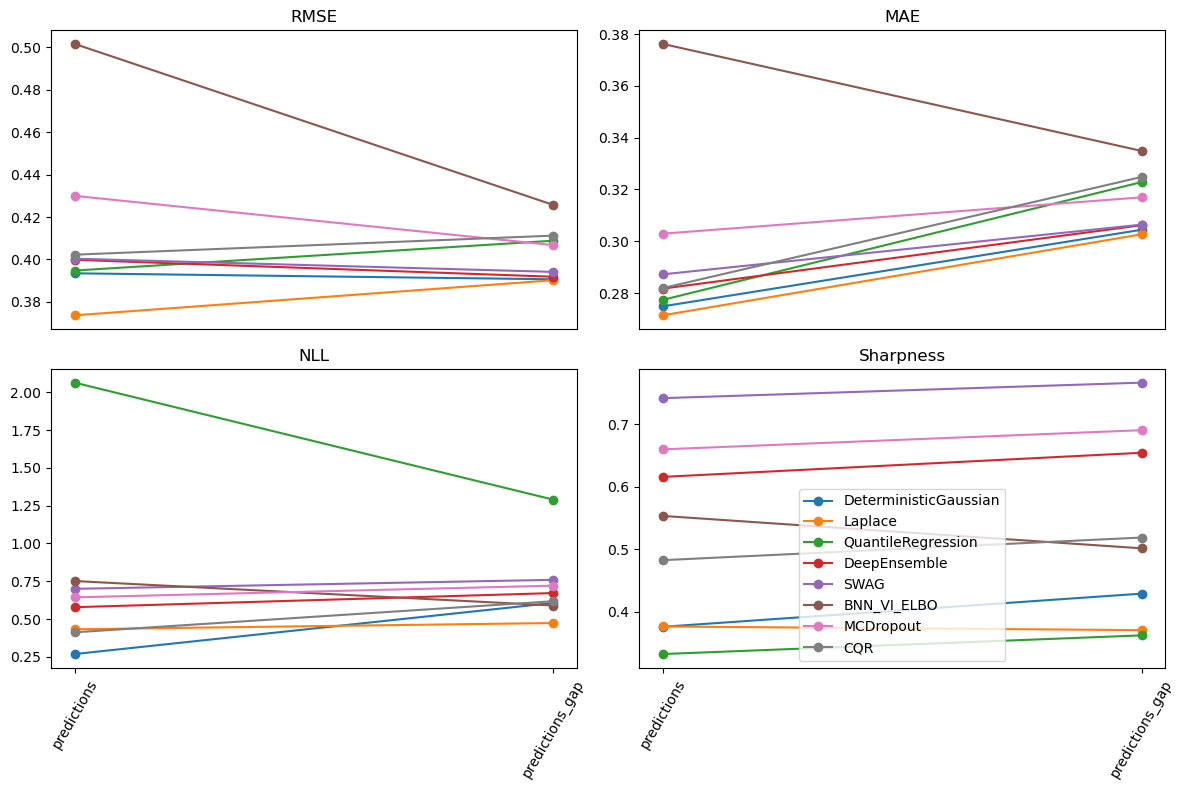

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    # "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]
create_ood_plot(uq_metric_df_gap[uq_metric_df_gap["uqmethod"].isin(uq_methods_to_show)], gap=True)

## Calibration

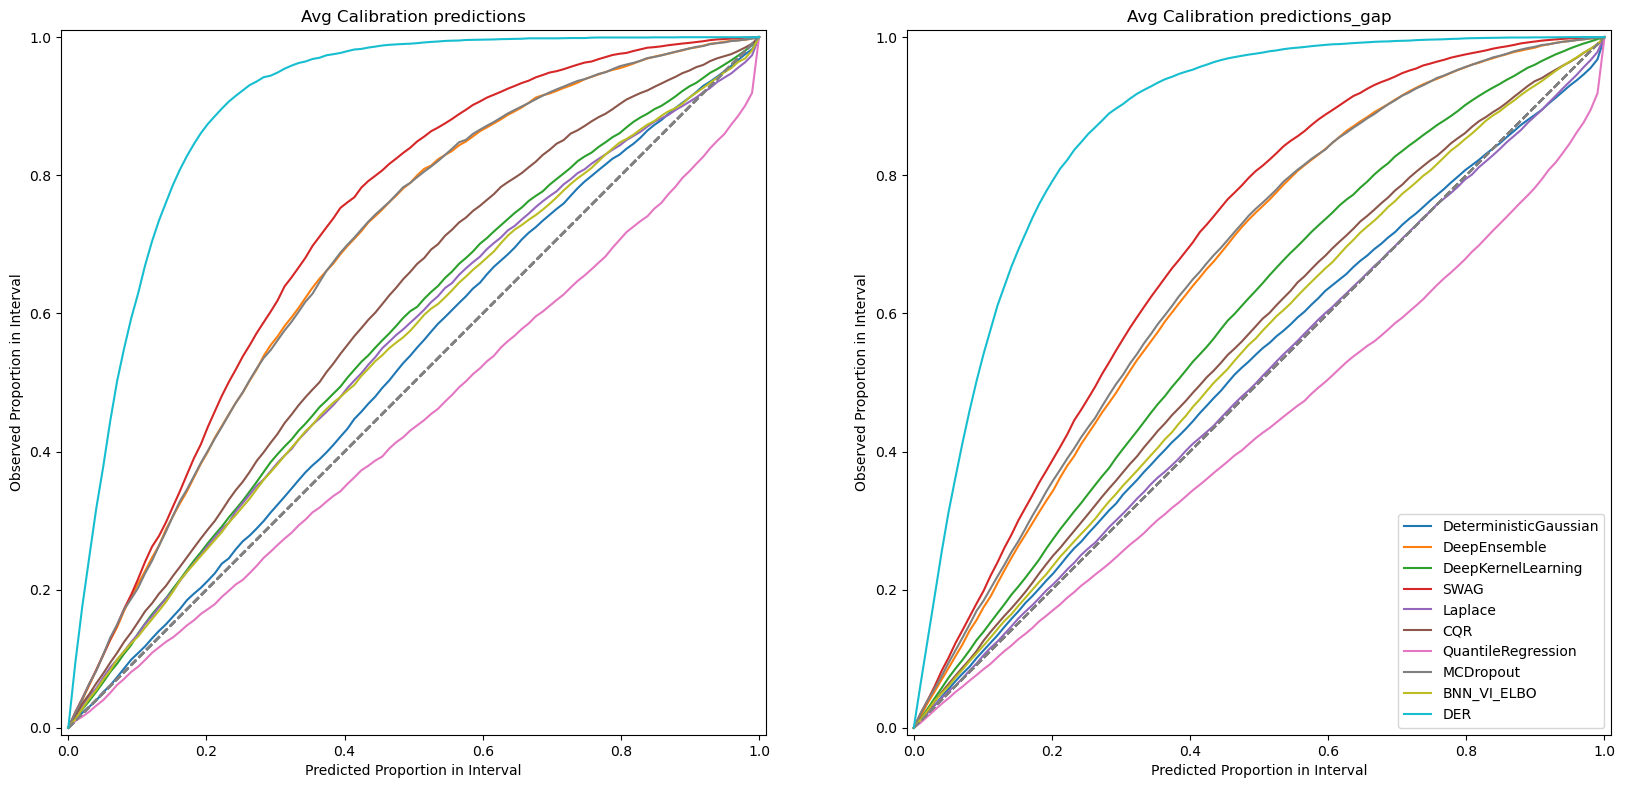

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    'DERModel', 
    # 'BaseModel'
]
generate_calibration_plot(uq_metric_df_gap, gap=True)

## Scatter Plots

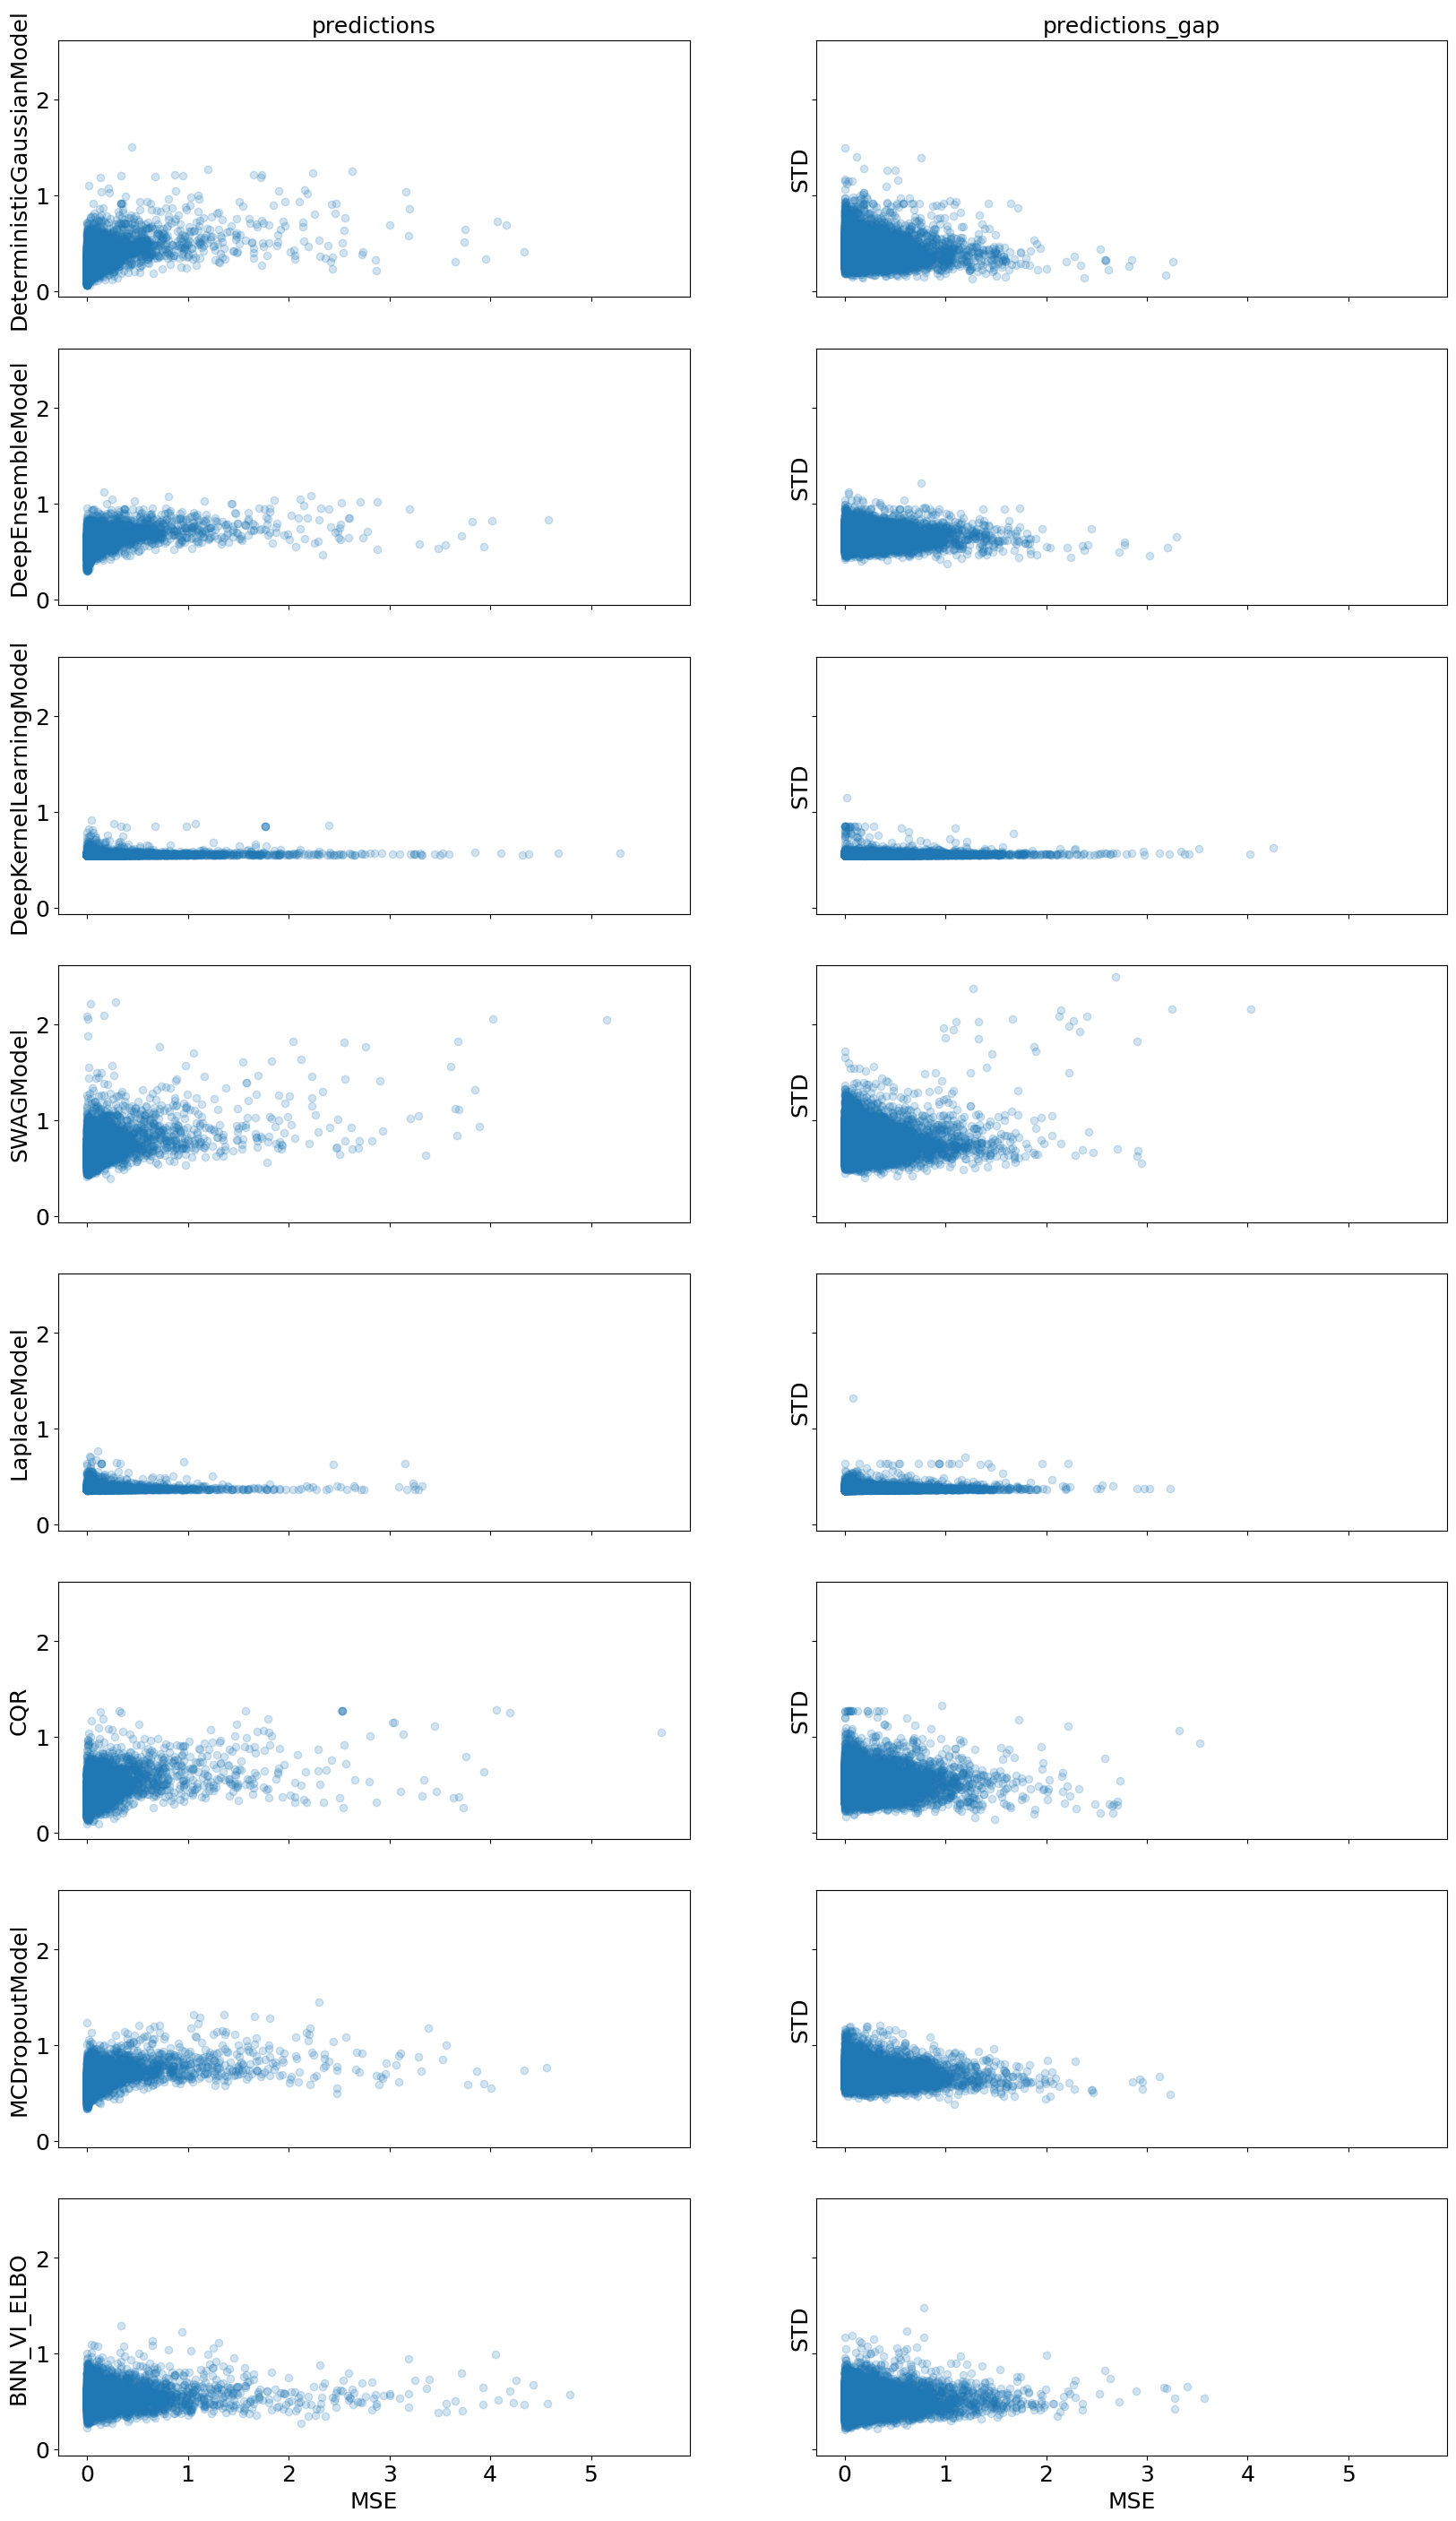

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    "DeepEnsembleModel",
    "DeepKernelLearningModel",
    "SWAGModel",
    "LaplaceModel",
    "CQR",
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]
generate_scatter_plots(overview_df_gap, gap=True)

# 

# Maps

In [ ]:
def points_to_bin(x, y, vals, scale=10.0):
    """bins points over 2d space with bin sizes specified by scale
     args:
     x,y: nx1 arrays of locations in 1 dimension each
     preds: nx1 array of values to be averaged
     scale: the edge of a bin/box in {x,y} units.
    returns:
     x0, y0: kx1, mx1 arrays of the x and y gridpoints
     vals_grid: (m-1)x(k-1) resulting aggregated values
    """
    x_range = np.max(x) - np.min(x)
    y_range = np.max(y) - np.min(y)
    bin_shapes = [int(y_range / scale), int(x_range / scale)]

    sums_grid, y0, x0 = np.histogram2d(y, x, bins=bin_shapes, weights=vals)
    counts, _, _ = np.histogram2d(y, x, bins=bin_shapes)
    vals_grid = sums_grid / counts
    vals_grid = np.ma.masked_invalid(vals_grid)

    return x0, y0, vals_grid

def aggregrate_and_bin_data(data_this, agg_scale=0.2):
    """Aggregated labels from the saved output of the primary analysis notebooks.
    Aggregate to 'agg_scale' for vizualization"""
    truth = data_this["targets"]
    preds = data_this["pred"]
    mse = (data_this["pred"] - data_this["targets"])**2
    # print(mse)
    std = data_this["pred_uct"]

    coeff = data_this["pred_uct"] / np.abs(data_this["pred"])
    
    # aggregate the data into averaged bins
    lat_points, lon_points, truth_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], truth, scale=agg_scale
    )
    _, _, mse_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], mse, scale=agg_scale
    )

    _, _, std_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], std, scale=agg_scale
    )

    _, _, coeff_binned = points_to_bin(
        data_this["centroid_lon"], data_this["centroid_lat"], coeff, scale=agg_scale
    )

    return lat_points, lon_points, truth_binned, mse_binned, std_binned, coeff_binned

# Plot everything in one

[0.34932081]
[0.28039663]
[0.24161501]
[0.1685939]


/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


[0.32932973]
[0.01618454]
[-0.03520348]
[-0.03404389]


/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


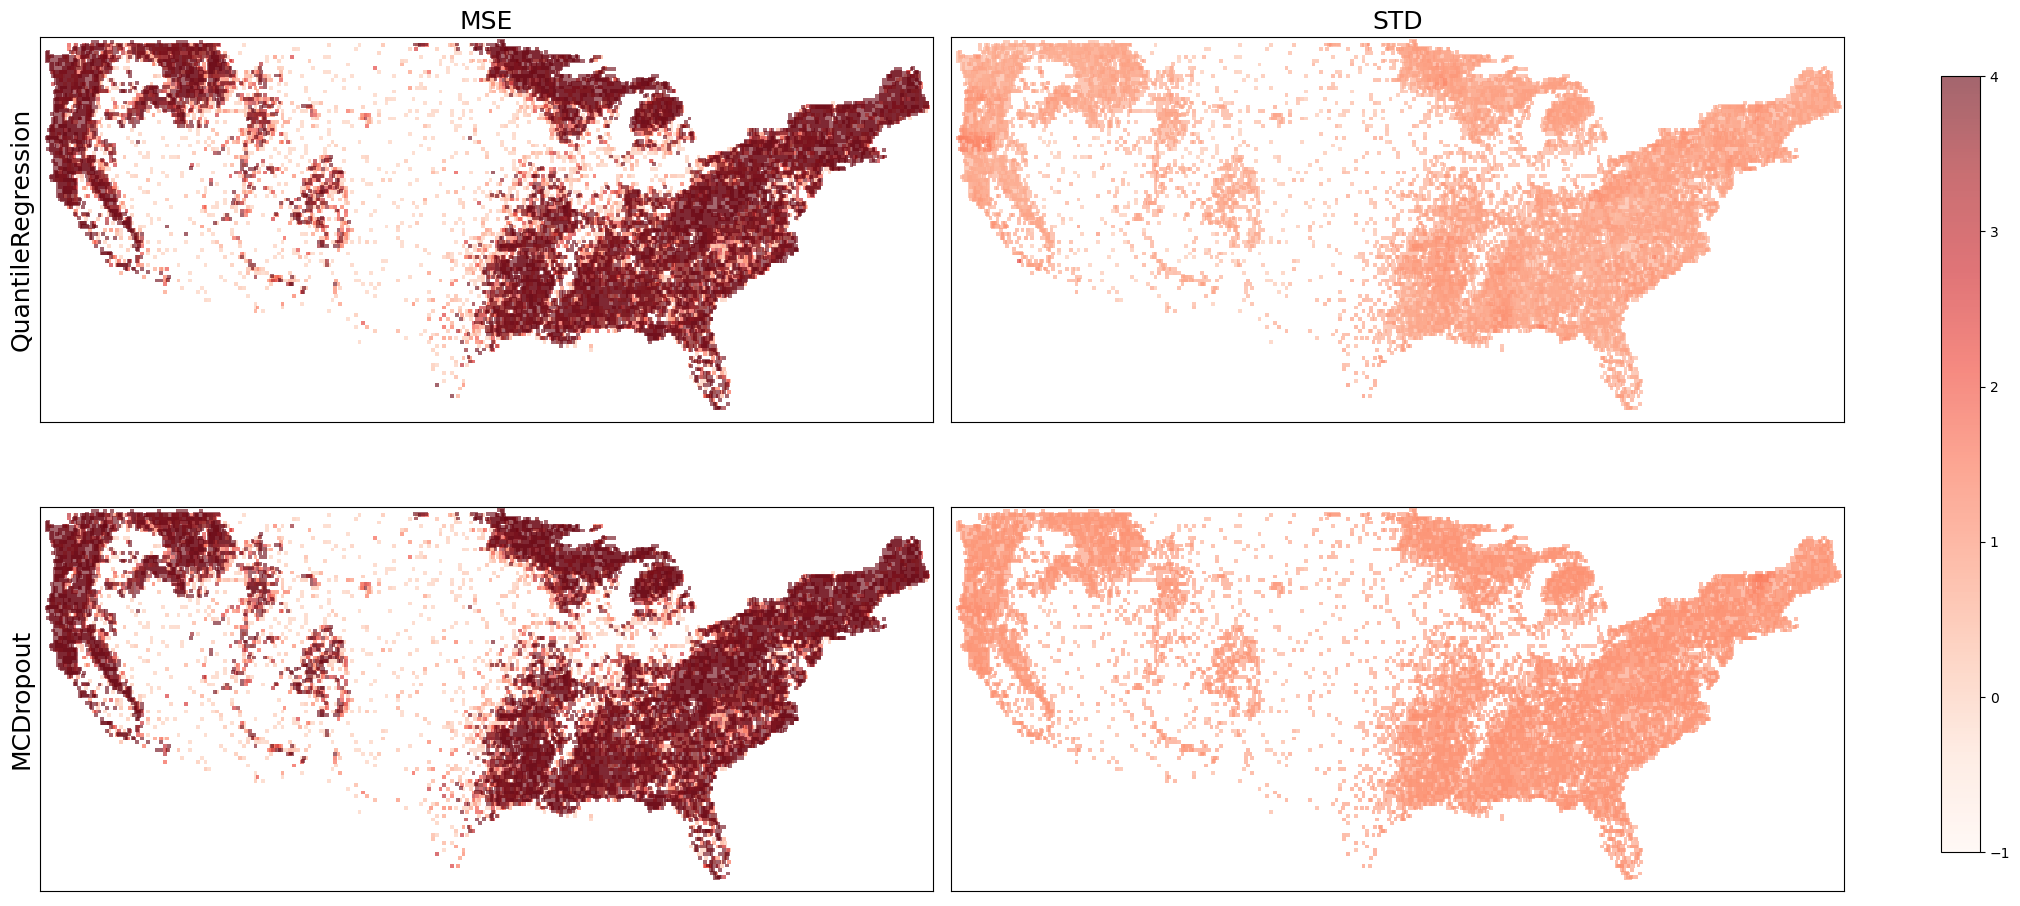

In [69]:
from mpl_toolkits.basemap import Basemap
from sklearn.feature_selection import r_regression

uq_methods_to_show = [
    # 'DeterministicGaussianModel', 
    # "DeepEnsembleModel",
    # "DeepKernelLearningModel",
    # "SWAGModel",
    # "LaplaceModel",
    # "CQR",
    'QuantileRegressionModel',
    'MCDropoutModel', 
    # 'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]

lat_min, lat_max = 24.396308, 49.384358
lon_min, lon_max = -125.000000, -66.934570
fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=2, figsize=(20, 10))

cmaps = ["Blues", "Greens", "Oranges", "Reds"]

for row_idx, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="pred_path", inplace=True)
    plot_df.reset_index(inplace=True)
    

    # plot each of the splits
    err_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 0])
    std_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 1])
    corrs = []
    for idx, row in plot_df.iterrows():
        split_df = pd.read_csv(row["pred_path"])
        mse = (split_df["pred"] - split_df["targets"])**2
        mae = np.abs(split_df["pred"] - split_df["targets"])
        # print(split_df["pred_uct"].values.shape)
        corr = r_regression(mae.values.reshape(-1, 1), split_df["pred_uct"].values)
        print(corr)
        corrs.append(corr[0])
        
        lat_points, lon_points, truth_binned, mse_binned, std_binned, coeff_binned = aggregrate_and_bin_data(split_df, agg_scale=0.25)

        # plot mse
        err_map.pcolormesh(lat_points, lon_points, mse_binned, latlon=True, alpha=0.6, cmap=cmaps[3], vmin = -1, vmax =4)
        # fig.colorbar(err_map, ax=axs[row_idx, 0])

        # plot STD
        std_map.pcolormesh(lat_points, lon_points, std_binned, latlon=True, alpha=0.6, cmap=cmaps[3], vmin = -1, vmax =4)
        # fig.colorbar(std_map, ax=axs[row_idx, 0])

        if row_idx == 0:
            axs[0, 0].set_title("MSE", fontsize=18)
            axs[0, 1].set_title("STD", fontsize=18)

    corr = round(np.array(corrs).mean(), 4)
    axs[row_idx, 0].set_ylabel(f"{uq_method.replace('Model', '')}", fontsize=18)

plt.tight_layout()
# fig, ax = plt.subplots(figsize=(10, 8))

ax=plt.gca() #get the current axes
PCM=ax.get_children()[0] #get the mappable, the 1st and the 2nd are the x and y axes
plt.colorbar(PCM, ax=axs, fraction = 0.02) 


# Compute 

# Coefficient of Variation Plot

/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts
/tmp/ipy

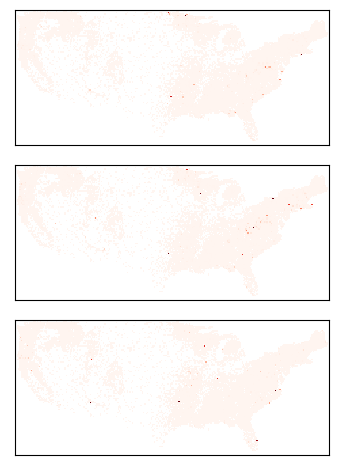

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    # 'QuantileRegressionModel',
    'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]

fig, axs = plt.subplots(nrows=len(uq_methods_to_show))

for row_idx, uq_method in enumerate(uq_methods_to_show):

    coeff_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', ax=axs[row_idx])

    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="pred_path", inplace=True)
    plot_df.reset_index(inplace=True)

    for idx, row in plot_df.iterrows():
        split_df = pd.read_csv(row["pred_path"])
        lat_points, lon_points, truth_binned, mse_binned, std_binned, coeff_binned = aggregrate_and_bin_data(split_df, agg_scale=0.25)

        # plot coefficient of variation
        coeff_map.pcolormesh(lat_points, lon_points, coeff_binned, latlon=True, cmap=cmaps[3])

plt.tight_layout()

# Colorcode OOD splits

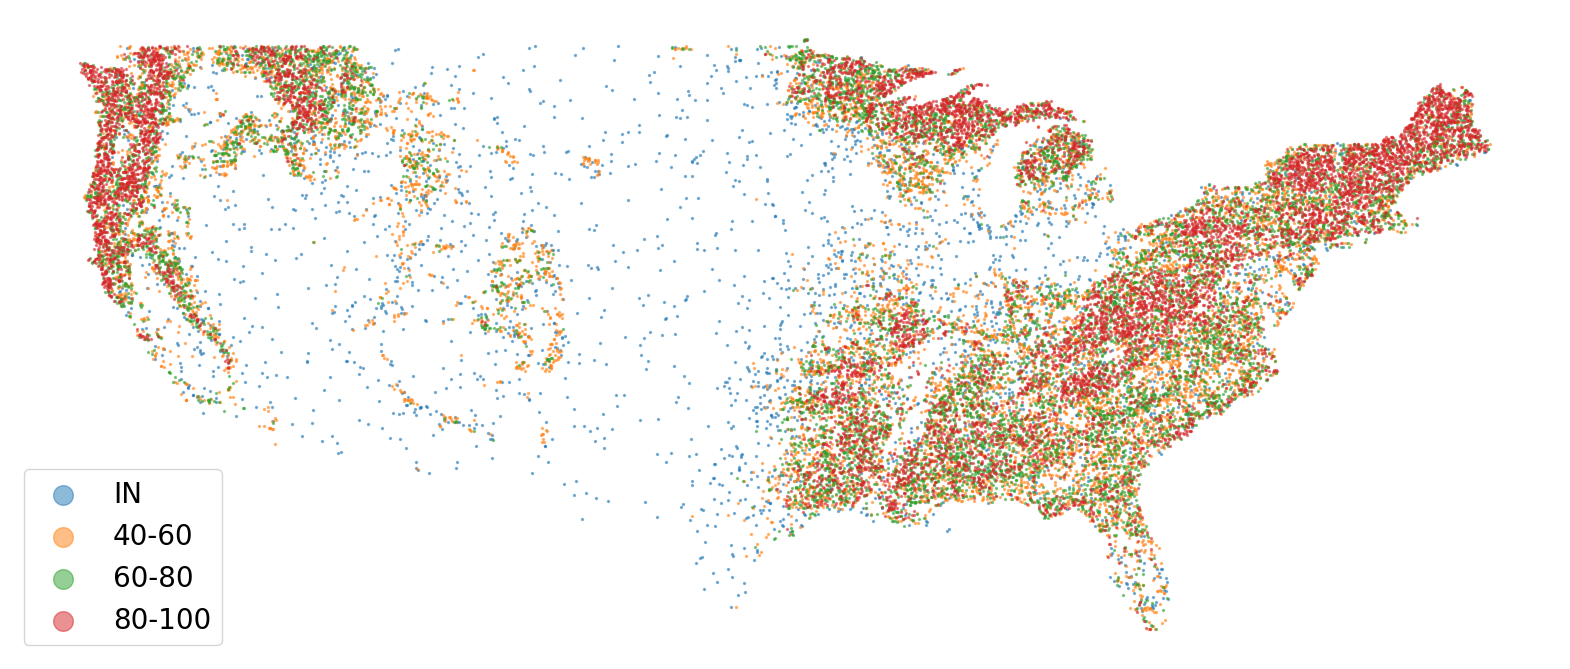

In [ ]:
base_df = overview_df[overview_df["uqmethod"]=="BaseModel"].copy()
base_df.sort_values(by="pred_path", inplace=True)
import geopandas
import geoplot as gplt

fig, axs = plt.subplots(1, figsize=(20, 12))
colors=["blue", "orange", "green", "red"]
labels = ["IN", "40-60", "60-80", "80-100"]
for idx, path in enumerate(base_df["pred_path"]):
    pred_df = pd.read_csv(path)#.sample(n=4000)

    pred_df = geopandas.GeoDataFrame(
        pred_df,
        geometry=geopandas.points_from_xy(pred_df["centroid_lon"], pred_df["centroid_lat"]),
    )
    pred_df.plot(ax=axs, markersize=2, alpha=0.5, label=labels[idx])

plt.axis("off")
plt.legend(prop={"size": 20}, markerscale=10)
plt.show()
    

In [ ]:
path.split(os.sep)[-1].split

<function str.split(sep=None, maxsplit=-1)>

# A map for each split

/tmp/ipykernel_17060/2290335653.py:17: RuntimeWarning: invalid value encountered in divide
  vals_grid = sums_grid / counts


ValueError: too many values to unpack (expected 5)

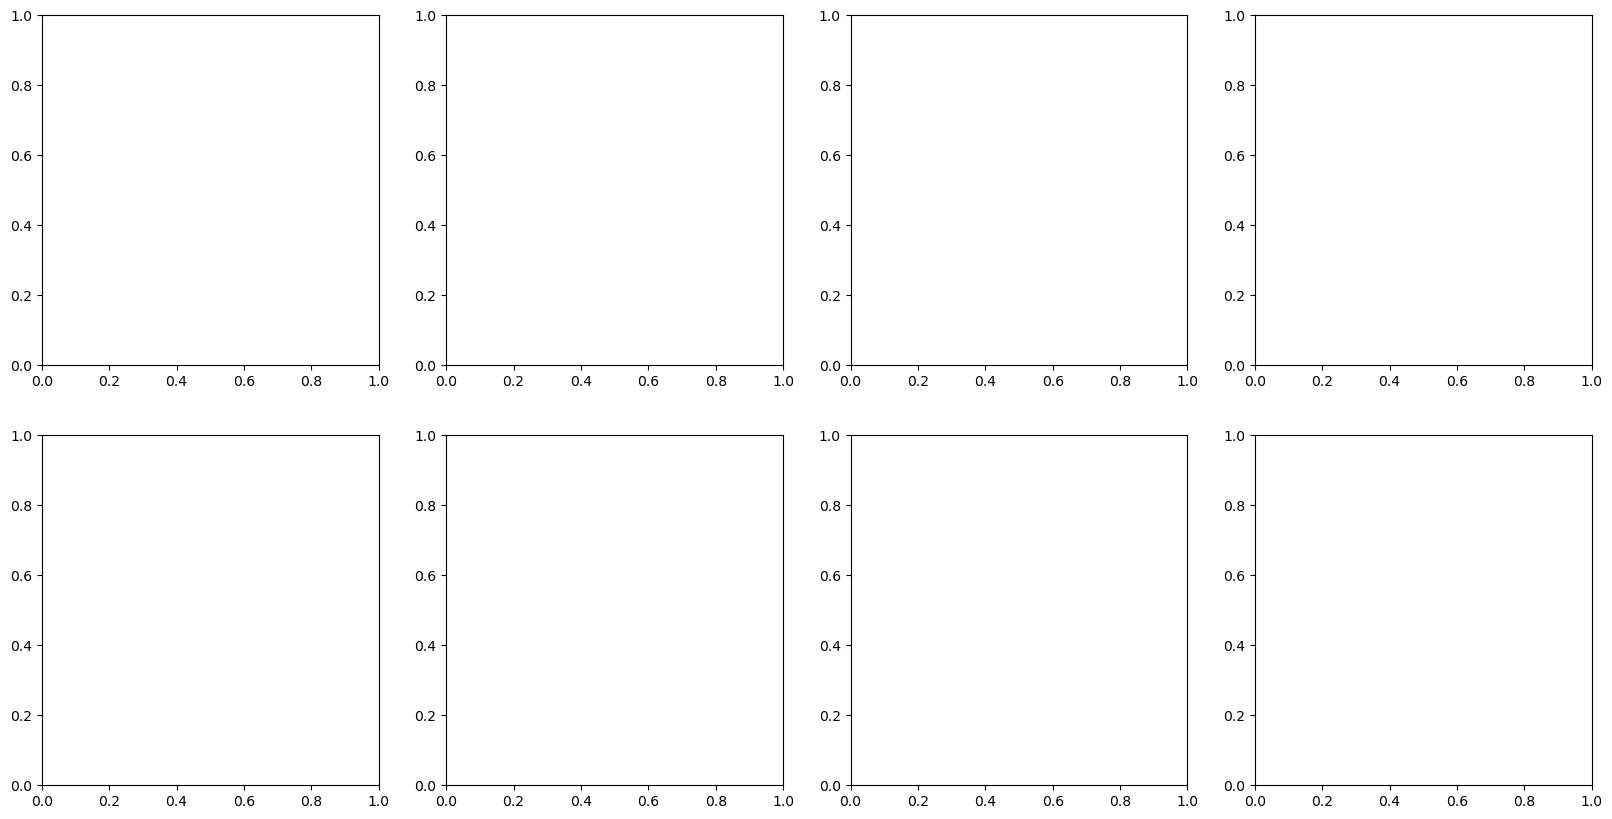

In [ ]:
uq_methods_to_show = [
    'DeterministicGaussianModel', 
    # 'QuantileRegressionModel',
    # 'MCDropoutModel', 
    'BNN_VI_ELBO', 
    # 'DERModel', 
    # 'BaseModel'
]

lat_min, lat_max = 24.396308, 49.384358
lon_min, lon_max = -125.000000, -66.934570
fig, axs = plt.subplots(nrows=len(uq_methods_to_show), ncols=4, figsize=(20, 10))

cmaps = ["Blues", "Greens", "Oranges", "Reds"]

for row_idx, uq_method in enumerate(uq_methods_to_show):
    plot_df = uq_metric_df[uq_metric_df["uqmethod"]==uq_method].copy()
    plot_df.sort_values(by="pred_path", inplace=True)
    plot_df.reset_index(inplace=True)

    # plot each of the splits
    # err_map = 
    # std_map = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, 1])
    for col_idx, row in plot_df.iterrows():
        split_basemap = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', ax=axs[row_idx, col_idx])
        split_df = pd.read_csv(row["pred_path"])
        lat_points, lon_points, truth_binned, mse_binned, std_binned = aggregrate_and_bin_data(split_df, agg_scale=0.25)

        # plot mse
        err_map.pcolormesh(lat_points, lon_points, mse_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(err_map, ax=axs[row_idx, col_idx])

        # # plot STD
        # std_map.pcolormesh(lat_points, lon_points, std_binned, latlon=True, cmap=cmaps[3])
        # fig.colorbar(std_map, ax=axs[row_idx, 0])

        if row_idx == 0:
            axs[0, col_idx].set_title(row["split"])


    axs[row_idx, 0].set_ylabel(uq_method)

plt.tight_layout()

# Tables

In [ ]:
tail_and_gap_uq_df = pd.concat([uq_metric_df, uq_metric_df_gap]).sort_values(by="uqmethod")
tail_and_gap_uq_df = tail_and_gap_uq_df[tail_and_gap_uq_df["split"] != "predictions"]
tail_and_gap_selective_df = pd.concat([selective_df, selective_df_gap]).sort_values(by="uqmethod")
tail_and_gap_selective_df = tail_and_gap_selective_df[tail_and_gap_selective_df["split"] != "predictions"]


diff_df = pd.DataFrame()

# Iterate over each column in the dataframes
for column in tail_and_gap_uq_df.columns:
    # Check if the column contains numerical values
    if pd.api.types.is_numeric_dtype(tail_and_gap_uq_df[column]):
        # Assign the difference to the new dataframe
        diff_df[column] = tail_and_gap_uq_df[column] - tail_and_gap_selective_df[column]
    else:
        # If the column contains non-numerical values, assign the values from df1 to the new dataframe
        diff_df[column] = tail_and_gap_uq_df[column]

display(diff_df)

nll      crps     check  interval       rms_cal        ma_cal  \
15  0.023587  0.004654  0.002349  0.028485  9.252253e-03  8.180223e-03   
8  -0.075790 -0.034667 -0.017515 -0.091602 -5.393145e-02 -4.561941e-02   
9   0.035916  0.069273  0.034957  0.629032 -4.854440e-02 -4.281225e-02   
10 -0.222173 -0.096140 -0.048441 -0.881693 -4.735505e-02 -3.692141e-02   
3        NaN       NaN       NaN       NaN           NaN           NaN   
42       NaN       NaN       NaN       NaN           NaN           NaN   
41       NaN       NaN       NaN       NaN           NaN           NaN   
40       NaN       NaN       NaN       NaN           NaN           NaN   
0  -0.223230  0.017908  0.009200 -0.048098 -2.490109e-04 -1.487337e-04   
21  0.020882  0.004192  0.002117  0.028193  1.235659e-02  1.104060e-02   
1  -0.015176  0.020314  0.010272  0.063002 -7.921334e-04 -7.059596e-04   
2  -0.684096  0.009169  0.004932 -0.194070  0.000000e+00  0.000000e+00   
17  0.108651  0.095775  0.048350  0.657340  1.004032e-02  8.954358e-03   
6  -0.047603 -0.017505 -0.008853 -0.026673 -4.344879e-02 -3.508572e-02   
5   0.052855  0.047594  0.024024  0.352910  1.341358e-03  6.660028e-04   
4   0.012612  0.022052  0.011122  0.245461 -3.543850e-02 -2.963091e-02   
37  0.047863  0.031857  0.016082  0.191573  3.232272e-03  2.657131e-03   
36 -0.015264  0.034881  0.017581  0.239985 -2.193678e-04 -1.323715e-04   
9   0.019434  0.004427  0.002235  0.025490  1.958195e-03  1.863378e-03   
38 -0.280086  0.029563  0.014996  0.125938 -1.793035e-05 -1.034126e-05   
13  0.019541  0.006338  0.003200  0.027941 -7.520422e-03 -6.773219e-03   
22  0.203092  0.045863  0.022975  0.443377  0.000000e+00  0.000000e+00   
21  0.033400  0.012062  0.006070  0.102664 -1.038730e-04 -5.018390e-05   
20  0.076731  0.020815  0.010434  0.195464 -4.347301e-07 -2.493633e-07   
1   0.008545  0.002514  0.001271  0.015835  1.148116e-02  1.021383e-02   
14 -1.028447  0.011183  0.005961 -0.243313 -1.167751e-03 -7.073423e-04   
12 -0.312242  0.025387  0.012937  0.042056 -1.254091e-03 -8.185891e-04   
13 -0.007705  0.030326  0.015326  0.146232 -5.279541e-04 -4.240572e-04   
26 -0.682516  0.012296  0.006347 -0.038186  0.000000e+00  0.000000e+00   
5   0.021689  0.005079  0.002565  0.025077 -9.438845e-04 -1.434576e-03   
24 -0.213244  0.006078  0.003138 -0.029514 -2.686019e-04 -1.634933e-04   
25 -0.049001 -0.000161 -0.000067 -0.033447 -3.751879e-03 -2.897015e-03   
19  0.020645  0.004250  0.002145  0.028163  4.338998e-03  3.773824e-03   
16 -0.058697  0.013937  0.007070  0.053394 -1.233013e-04 -7.476547e-05   
17  0.012930  0.016811  0.008496  0.084718  1.041297e-03  7.768191e-04   
18 -0.234195  0.015525  0.007928  0.024034  0.000000e+00  0.000000e+00   
34 -1.088461  0.016894  0.008796 -0.113231 -1.795517e-06 -1.034126e-06   
7  -0.072121  0.000931  0.000476 -0.002102 -2.053730e-02 -1.930889e-02   
33 -0.028246  0.028019  0.014170  0.114058  5.010824e-04  4.873357e-04   
32 -0.350774  0.027296  0.013919  0.047202 -1.360771e-04 -8.179819e-05   
11  0.032026  0.007016  0.003542  0.049007  7.372108e-03  6.549499e-03   
28 -0.008890  0.037312  0.018799  0.262285 -3.413429e-04 -2.088025e-04   
29  0.053038  0.034000  0.017162  0.211310  3.161731e-03  2.653381e-03   
30 -0.293055  0.031350  0.015901  0.130849 -5.708879e-05 -3.309204e-05   

     miscal_area     sharp       mae      rmse      mdae     marpd        r2  \
15  8.267228e-03  0.029317  0.005394  0.006546  0.005996  0.426955 -0.066985   
8  -4.608021e-02  1.580744 -0.056987 -0.042189 -0.044945 -3.201670  1.350205   
9  -4.324020e-02  4.932042 -0.042820 -0.026566 -0.041241 -3.318857  0.497878   
10 -3.729435e-02  1.238790 -0.052438 -0.036932 -0.039608 -2.343202  1.917947   
3            NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
42           NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
41           NaN       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
40           NaN       NaN  0.000000  

## Selective Prediction Tables

In [ ]:
def generate_latex_table_for_metric(df, metric="rmse"):
    data_df = pd.pivot_table(df[df["uqmethod"]!="BaseModel"], values=metric, index="uqmethod", columns="split").reset_index()
    data_df.columns = data_df.columns.str.replace("predictions", metric)

    pivot_table_rounded = data_df.round(3)

    # Find the maximum value per column
    max_values = pivot_table_rounded.max()

    def format_max_value(x):
        if pd.api.types.is_numeric_dtype(x) and x == x.max():
            return "\\textbf{" + str(x) + "}"
        return str(x)

    # Apply the formatting function to the pivot table dataframe
    pivot_table_latex = pivot_table_rounded.applymap(format_max_value)

    latex_output = pivot_table_latex.to_latex(escape=False, index=False)

    for column in max_values.index:
        latex_output = latex_output.replace(str(max_values[column]), "\\textbf{" + str(max_values[column]) + "}")
        latex_column = column.replace('_', '\\_')
        latex_output = latex_output.replace(column, latex_column)
        # latex_output = latex_output.replace("predictions", metric)

    # Output the LaTeX representation of the pivot table
    return latex_output

latex_table1 = generate_latex_table_for_metric(tail_and_gap_uq_df)
latex_table2 = generate_latex_table_for_metric(tail_and_gap_selective_df)
latex_table3 = generate_latex_table_for_metric(diff_df)


print(latex_table3)

\begin{tabular}{lllll}
\toprule
uqmethod & rmse\_40\_60 & rmse\_60\_80 & rmse\_80\_100 & rmse\_gap \\
\midrule
BNN_VI_ELBO & -0.027 & -0.042 & -0.037 & 0.007 \\
CQR & 0.033 & 0.031 & 0.025 & 0.005 \\
DERModel & 0.045 & 0.039 & 0.021 & 0.007 \\
DeepEnsembleModel & 0.042 & 0.044 & 0.041 & 0.006 \\
DeepKernelLearningModel & 0.016 & 0.024 & \textbf{0.052} & \textbf{0.013} \\
DeterministicGaussianModel & \textbf{0.046} & 0.041 & 0.034 & 0.002 \\
LaplaceModel & 0.006 & \textbf{0.013} & 0.023 & 0.01 \\
MCDropoutModel & 0.023 & 0.019 & 0.024 & 0.004 \\
QuantileRegressionModel & 0.042 & 0.041 & 0.033 & 0.001 \\
\textbf{SWAGModel} & \textbf{0.046} & \textbf{0.048} & 0.044 & 0.007 \\
\bottomrule
\end{tabular}



In [ ]:
metric = "rmse"
tail_and_gap_selective_df["category"] = "selective"
tail_and_gap_uq_df["category"] = "normal"
diff_df["category"] = "difference"
diff_df

category_columns = ["normal", "selective", "difference"]
splits = ["predictions_40_60", "predictions_60_80", "predictions_80_100", "predictions_gap"]
dfs = [tail_and_gap_uq_df, tail_and_gap_selective_df, diff_df]

columns = pd.MultiIndex.from_product([splits, category_columns])

# Create an empty dataframe with the multi-index column index
combined_df = pd.DataFrame(columns=columns)
combined_df

# combined_df["uqmethod"] = tail_and_gap_selective_df["uqmethod"].unique()
for split in splits:
    for df, category in zip(dfs, category_columns):
        # print(category)
        # print(len(df[df["split"]==split][metric]))
        if category in df.category.unique():
            # print(df[df["split"]==split])
            combined_df[(split, category)] = df[df["split"]==split][metric].reset_index(drop=True)

combined_df.insert(0, ("", "UQ Method"), tail_and_gap_selective_df["uqmethod"].unique())
combined_df= combined_df.round(4)
combined_df = combined_df[combined_df[("", "UQ Method")]!="BaseModel"]
combined_df

predictions_40_60                       \
                     UQ Method            normal selective difference   
0                  BNN_VI_ELBO            1.9768    2.0033    -0.0266   
2                          CQR            1.7270    1.6941     0.0330   
3                     DERModel            1.7291    1.6843     0.0448   
4            DeepEnsembleModel            1.7584    1.7161     0.0423   
5      DeepKernelLearningModel            1.9958    1.9801     0.0157   
6   DeterministicGaussianModel            1.7334    1.6874     0.0461   
7                 LaplaceModel            1.7892    1.7829     0.0063   
8               MCDropoutModel            1.8274    1.8045     0.0229   
9      QuantileRegressionModel            1.6490    1.6066     0.0424   
10                   SWAGModel            1.7293    1.6831     0.0462   

   predictions_60_80                      predictions_80_100            \
              normal selective difference             normal selective   
0             3.3904    3.4326    -0.0422             4.9410    4.9779   
2             3.1740    3.1426     0.0313             4.6137    4.5889   
3             3.0939    3.0547     0.0392             4.4607    4.4394   
4             3.1962    3.1520     0.0442             4.6211    4.5801   
5             3.5189    3.4946     0.0243             5.0373    4.9855   
6             3.1605    3.1195     0.0410             4.5785    4.5445   
7             3.2444    3.2312     0.0132             4.6772    4.6543   
8             3.2731    3.2540     0.0192             4.7034    4.6796   
9             3.0427    3.0015     0.0412             4.4466    4.4140   
10            3.1468    3.0989     0.0479             4.5604    4.5162   

              predictions_gap                       
   difference          normal selective difference  
0     -0.0369          0.4257    0.4191     0.0065  
2      0.0248          0.4112    0.4065     0.0047  
3      0.0213          0.4270    0.4203     0.0067  
4      0.0410          0.3919    0.3856     0.0062  
5      0.0518          0.4320    0.4186     0.0134  
6      0.0340          0.3907    0.3888     0.0018  
7      0.0230          0.3902    0.3803     0.0099  
8      0.0237          0.4068    0.4028     0.0039  
9      0.0326          0.4089    0.4074     0.0014  
10     0.0442          0.3942    0.3873     0.0068

In [ ]:
# Find the maximum value per column
max_values = combined_df.max()
min_values = combined_df.min()

def format_max_value(x):
    if pd.api.types.is_numeric_dtype(x) and x == x.max():
        return "\\textbf{" + str(x) + "}"
    return str(x)

# Apply the formatting function to the pivot table dataframe
pivot_table_latex = combined_df.applymap(format_max_value)

latex_output = pivot_table_latex.to_latex(escape=False, index=False)

for column in max_values.index:
    if "UQ Method" in column[0]:
        continue
    if "difference" in column[1]:
        latex_output = latex_output.replace(str(max_values[column]), "\\textbf{" + str(max_values[column]) + "}")
    else:
        latex_output = latex_output.replace(str(min_values[column]), "\\textbf{" + str(min_values[column]) + "}")

# Output the LaTeX representation of the pivot table
latex_output = latex_output.replace("_", "\\_")
latex_output = latex_output.replace("\multicolumn{3}{r}", "\multicolumn{3}{c}")
latex_output = latex_output.replace("difference", "difference $\downarrow$")
latex_output = latex_output.replace("down", "up")
latex_output = latex_output.replace("normal", "normal $\downarrow$")
latex_output = latex_output.replace("selective", "selective $\downarrow$")
latex_output = latex_output.replace("Model", "")
latex_output = latex_output.replace("{lllllllllllll}", "{lccc|ccc|ccc|ccc}")

print(latex_output)

\begin{tabular}{lccc|ccc|ccc|ccc}
\toprule
 & \multicolumn{3}{c}{predictions\_40\_60} & \multicolumn{3}{c}{predictions\_60\_80} & \multicolumn{3}{c}{predictions\_80\_100} & \multicolumn{3}{c}{predictions\_gap} \\
UQ Method & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ & normal $\downarrow$ & selective $\downarrow$ & difference $\uparrow$ \\
\midrule
\textbf{BNN\_VI\_ELBO} & 1.9768 & 2.0033 & -0.0266 & 3.3904 & 3.4326 & -0.0422 & 4.941 & 4.9779 & -0.0369 & 0.4257 & 0.4191 & 0.0065 \\
CQR & 1.727 & 1.6941 & 0.033 & 3.174 & 3.1426 & 0.0313 & 4.6137 & 4.5889 & 0.0248 & 0.4112 & 0.4065 & 0.0047 \\
DER & 1.7291 & 1.6843 & 0.0448 & 3.0939 & 3.0547 & 0.0392 & 4.4607 & 4.4394 & 0.0213 & 0.427 & 0.4203 & 0.0067 \\
DeepEnsemble & 1.7584 & 1.7161 & 0.0423 & 3.1962 & 3.152 & 0.0442 & 4.6211 & 4.5801 & 0.041 & 0.3919 & 0.3856 & 0.0062 

# Main Table

In [ ]:
tail_and_gap_uq_df = pd.concat([uq_metric_df, uq_metric_df_gap]).sort_values(by="uqmethod")
tail_and_gap_uq_df['ood_type'] = tail_and_gap_uq_df['pred_path'].apply(lambda x: 'tail' if 'tail' in x else 'gap')
tail_and_gap_uq_df

nll      crps     check   interval   rms_cal    ma_cal  miscal_area  \
15   0.589385  0.240868  0.121624   1.207721  0.049622  0.044486     0.044935   
14   0.751270  0.277390  0.140052   1.431053  0.060364  0.053527     0.054064   
8    3.427549  2.356801  1.190064  11.773302  0.361836  0.327392     0.330699   
9    2.289715  1.308662  0.660814   6.330260  0.141041  0.124969     0.126220   
10   5.003893  3.706478  1.870634  21.315295  0.467293  0.415240     0.419434   
..        ...       ...       ...        ...       ...       ...          ...   
28   8.458823  2.630198  1.324478  19.592860  0.568733  0.489182     0.494123   
29   3.016578  1.212021  0.611920   6.442932  0.451710  0.401849     0.405908   
30  16.981366  4.060133  2.039709  34.463785  0.570045  0.489967     0.494916   
31   0.942227  0.340769  0.172065   1.717686  0.101154  0.092612     0.093547   
10   0.699727  0.241204  0.121784   1.342861  0.245218  0.217925     0.220126   

       sharp       mae      rmse      mdae       marpd          r2      corr  \
15  0.501389  0.334885  0.425677  0.280210  119.489192   -1.435698  0.429059   
14  0.553251  0.376193  0.501592  0.292074   55.986152    0.749208  0.871138   
8   3.641050  3.290492  3.390369  3.286432  128.749311  -50.304547  0.053983   
9   6.899280  1.827287  1.976771  1.815486  111.962003  -16.566603  0.092218   
10  3.389618  4.861774  4.940996  4.841556  145.090830 -129.100405 -0.055663   
..       ...       ...       ...       ...         ...         ...       ...   
28  0.803445  3.081275  3.146777  3.055204  114.924700  -43.197129  0.071461   
29  0.801162  1.626176  1.729338  1.595271   93.213885  -12.444190  0.177298   
30  0.812700  4.515485  4.560396  4.479012  128.564642 -109.829354  0.109498   
31  0.776968  0.470756  0.603230  0.387260   87.915975    0.639352  0.799723   
10  0.741665  0.287237  0.400383  0.204124   41.669388    0.840204  0.918813   

                 split                                          pred_path  \
15     predictions_gap  /p/project/hai_uqmethodbox/experiment_output/u...   
14         predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
8    predictions_60_80  /p/project/hai_uqmethodbox/experiment_output/u...   
9    predictions_40_60  /p/project/hai_uqmethodbox/experiment_output/u...   
10  predictions_80_100  /p/project/hai_uqmethodbox/experiment_output/u...   
..                 ...                                                ...   
28   predictions_60_80  /p/project/hai_uqmethodbox/experiment_output/u...   
29   predictions_40_60  /p/project/hai_uqmethodbox/experiment_output/u...   
30  predictions_80_100  /p/project/hai_uqmethodbox/experiment_output/u...   
31         predictions  /p/project/hai_uqmethodbox/experiment_output/u...   
10         predictions  /p/project/hai_uqmethodbox/experiment_output/u...   

       uqmethod ood_type  
15  BNN_VI_ELBO      gap  
14  BNN_VI_ELBO      gap  
8   BNN_VI_ELBO     tail  
9   BNN_VI_ELBO     tail  
10  BNN_VI_ELBO     tail  
..          ...      ...  
28    SWAGModel     tail  
29    SWAGModel     tail  
30    SWAGModel     tail  
31    SWAGModel     tail  
10    SWAGModel      gap  

[66 rows x 18 columns]

In [ ]:
# metrics = ["rmse", "nll"]
diff_df

category_columns = ["rmse", "nll"]
splits = ["Tail In", "Tail Out", "Gap In", "Gap Out"]
dfs = [tail_and_gap_uq_df, tail_and_gap_selective_df, diff_df]

columns = pd.MultiIndex.from_product([splits, category_columns])

# Create an empty dataframe with the multi-index column index
combined_df = pd.DataFrame(columns=columns)
combined_df

# combined_df["uqmethod"] = tail_and_gap_selective_df["uqmethod"].unique()
for split in splits:
    # add indistribution
    if "tail" in split.lower():
        print("TAILS")
        ood_type="tail"
    else:
        ood_type="gap"

    table_df = tail_and_gap_uq_df[tail_and_gap_uq_df["ood_type"]==ood_type]

    if "in" in split.lower():
        table_df = table_df[table_df["split"]=="predictions"]
    else:
        table_df = table_df[table_df["split"]!="predictions"]
    print(table_df)
    table_df = table_df.groupby("uqmethod")[category_columns].mean().reset_index()

    for metric in category_columns:
        combined_df[(split, metric)] = table_df[metric]


combined_df.insert(0, ("", "UQ Method"), tail_and_gap_selective_df["uqmethod"].unique())
combined_df= combined_df.round(4)
# combined_df = combined_df[combined_df[("", "UQ Method")]!="BaseModel"]
combined_df

TAILS
         nll      crps     check  interval   rms_cal    ma_cal  miscal_area  \
11  1.699393  0.700246  0.353537  4.136831  0.252814  0.227486     0.229784   
43       NaN       NaN       NaN       NaN       NaN       NaN          NaN   
3   0.893323  0.337769  0.170549  1.684651  0.080073  0.071438     0.072159   
7   1.824458  0.660618  0.333516  4.180209  0.383350  0.342406     0.345865   
39  0.937313  0.341356  0.172361  1.717152  0.099419  0.090994     0.091914   
23  1.081120  0.405365  0.204691  1.954237  0.010294  0.007513     0.007553   
15  0.873796  0.337753  0.170541  1.647452  0.015260  0.013627     0.013762   
27  0.920277  0.340812  0.172092  1.680476  0.018245  0.015589     0.015733   
19  0.979211  0.355598  0.179552  1.787621  0.096110  0.087835     0.088722   
35  1.510065  0.331377  0.167315  1.646637  0.015634  0.013924     0.014060   
31  0.942227  0.340769  0.172065  1.717686  0.101154  0.092612     0.093547   

       sharp       mae      rmse      mdae   

Tail In         Tail Out           Gap In  \
                     UQ Method    rmse     nll     rmse      nll    rmse   
0                  BNN_VI_ELBO  0.8681  1.6994   3.4360   3.5737  0.5016   
1                    BaseModel  0.6065     NaN   3.2369      NaN  0.3737   
2                          CQR  0.6106  0.8933   3.1716   9.5268  0.4023   
3                     DERModel  0.6283  1.8245   3.0946   2.7832  0.4337   
4            DeepEnsembleModel  0.6059  0.9373   3.1919   9.3515  0.3999   
5      DeepKernelLearningModel  0.7119  1.0811   3.5174  12.9122  0.4974   
6   DeterministicGaussianModel  0.6117  0.8738   3.1575  12.5175  0.3935   
7                 LaplaceModel  0.6065  0.9203   3.2369  15.4037  0.3737   
8               MCDropoutModel  0.6298  0.9792   3.2680   8.4000  0.4300   
9      QuantileRegressionModel  0.6136  1.5101   3.0461  12.6902  0.3948   
10                   SWAGModel  0.6032  0.9422   3.1455   9.4856  0.4004   

           Gap Out          
       nll    rmse     nll  
0   0.7513  0.4257  0.5894  
1      NaN  0.3902     NaN  
2   0.4120  0.4112  0.6178  
3   1.6095  0.4270  1.7816  
4   0.5782  0.3919  0.6717  
5   0.7309  0.4320  0.6302  
6   0.2681  0.3907  0.6066  
7   0.4321  0.3902  0.4735  
8   0.6433  0.4068  0.7208  
9   2.0641  0.4089  1.2895  
10  0.6997  0.3942  0.7593

In [50]:
rankings = {}
for col in combined_df.columns:
    rankings[col] = combined_df[col].rank(method="max")

ranking_df = pd.DataFrame(rankings)
ranking_df[("", "UQ Method")] = combined_df[("", "UQ Method")]
for metric in category_columns:
    metric_cols = [("Tail In", metric), ("Tail Out", metric), ("Gap In", metric), ("Gap Out", metric)]
    combined_df[("Average Rank", metric)] = ranking_df[metric_cols].mean(axis=1)
# ranking_df
combined_df

Tail In         Tail Out           Gap In  \
                     UQ Method    rmse     nll     rmse      nll    rmse   
0                  BNN_VI_ELBO  0.8681  1.6994   3.4360   3.5737  0.5016   
1                    BaseModel  0.6065     NaN   3.2369      NaN  0.3737   
2                          CQR  0.6106  0.8933   3.1716   9.5268  0.4023   
3                     DERModel  0.6283  1.8245   3.0946   2.7832  0.4337   
4            DeepEnsembleModel  0.6059  0.9373   3.1919   9.3515  0.3999   
5      DeepKernelLearningModel  0.7119  1.0811   3.5174  12.9122  0.4974   
6   DeterministicGaussianModel  0.6117  0.8738   3.1575  12.5175  0.3935   
7                 LaplaceModel  0.6065  0.9203   3.2369  15.4037  0.3737   
8               MCDropoutModel  0.6298  0.9792   3.2680   8.4000  0.4300   
9      QuantileRegressionModel  0.6136  1.5101   3.0461  12.6902  0.3948   
10                   SWAGModel  0.6032  0.9422   3.1455   9.4856  0.4004   

           Gap Out         Average Rank        
       nll    rmse     nll         rmse   nll  
0   0.7513  0.4257  0.5894        10.25  5.25  
1      NaN  0.3902     NaN         4.00   NaN  
2   0.4120  0.4112  0.6178         6.25  3.50  
3   1.6095  0.4270  1.7816         7.25  7.50  
4   0.5782  0.3919  0.6717         4.25  4.50  
5   0.7309  0.4320  0.6302        10.50  7.00  
6   0.2681  0.3907  0.6066         4.00  3.00  
7   0.4321  0.3902  0.4735         4.00  4.25  
8   0.6433  0.4068  0.7208         8.00  5.25  
9   2.0641  0.4089  1.2895         4.75  8.75  
10  0.6997  0.3942  0.7593         3.75  6.00

In [49]:
# Find the maximum value per column
max_values = combined_df.max()
min_values = combined_df.min()

def format_max_value(x):
    if pd.api.types.is_numeric_dtype(x) and x == x.max():
        return "\\textbf{" + str(x) + "}"
    return str(x)

# Apply the formatting function to the pivot table dataframe
pivot_table_latex = combined_df.applymap(format_max_value)

latex_output = pivot_table_latex.to_latex(escape=False, index=False)

for column in max_values.index:
    if "UQ Method" in column[0]:
        continue
    else:
        latex_output = latex_output.replace(str(min_values[column]), "\\textbf{" + str(min_values[column]) + "}")
        

# Output the LaTeX representation of the pivot table
latex_output = latex_output.replace("{lllllllll}", "{lcc|cc|cc|cc}")
latex_output = latex_output.replace("_", "\\_")
latex_output = latex_output.replace("\multicolumn{2}{r}", "\multicolumn{2}{c}")
latex_output = latex_output.replace("nan", "-")
for metric in category_columns:
    latex_output = latex_output.replace(metric, f"{metric} $\downarrow$")
latex_output = latex_output.replace("Model", "")
print(latex_output)

\begin{tabular}{lllllllllll}
\toprule
 & \multicolumn{2}{c}{Tail In} & \multicolumn{2}{c}{Tail Out} & \multicolumn{2}{c}{Gap In} & \multicolumn{2}{c}{Gap Out} & \multicolumn{2}{c}{Average Rank} \\
UQ Method & rmse $\downarrow$ & nll $\downarrow$ & rmse $\downarrow$ & nll $\downarrow$ & rmse $\downarrow$ & nll $\downarrow$ & rmse $\downarrow$ & nll $\downarrow$ & rmse $\downarrow$ & nll $\downarrow$ \\
\midrule
\textbf{BNN\_VI\_ELBO} & 0.8681 & 1.6994 & 3.436 & \textbf{3.5}737 & 0.5016 & 0.7513 & 0.4257 & 0.5894 & 10.25 & 5.25 \\
Base & 0.6065 & - & 3.2369 & - & \textbf{0.3737} & - & \textbf{0.3902} & - & \textbf{3.5} & - \\
CQR & 0.6106 & 0.8933 & 3.1716 & 9.5268 & 0.4023 & 0.412 & 0.4112 & 0.6178 & 6.25 & \textbf{3.5} \\
DER & 0.6283 & 1.8245 & \textbf{3.0}946 & \textbf{2.7832} & 0.4337 & 1.6095 & 0.427 & 1.7816 & 7.25 & 7.5 \\
DeepEnsemble & 0.6059 & 0.9373 & 3.1919 & 9.3515 & 0.3999 & 0.5782 & 0.3919 & 0.6717 & 4.25 & 4.5 \\
DeepKernelLearning & 0.7119 & 1.0811 & \textbf{3.5}174 & 1